In [4]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import catboost
from catboost import CatBoostClassifier

In [7]:
path = "D:\\FinalProjectSistLab\\data\\smoke_dataset.csv"
df = pd.read_csv(path)

Veri setinin 
+ ön analizi, 
+ veri keşfi, 
+ veri temizliği aşamaları ve 
+ görselleştirmeleri ile ilk bulgularınızı belirleyin.


Veri setinize ve hedefinize uygun modeli veya modelleri uygulayın. 
Modelin tutarlığını test ederek, sonuçları değerlendirin.


## ÖN ANALİZ

In [8]:
df.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [9]:
df.tail()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38981,40,170,105,124.0,0.6,0.5,1,1,141,85,...,48,138,17.1,1,0.8,24,23,35,1,1
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1
38983,55,175,60,81.1,1.0,1.0,1,1,114,66,...,64,137,13.9,1,1.0,18,12,16,0,1


In [10]:
df.shape

(38984, 23)

In [11]:
df.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

Sütunların anlamlarını detaylı şekilde açıklayalım:

- 'age' : Kişinin yaşı
- 'height(cm)' : Kişinin cm cinsinden boyu
- 'weight(kg)': Kişinin kg cinsinden kilosu
- 'waist(cm)': bel ölçüsü 
- 'eyesight(left)': sol göz görme yeteneği
- 'eyesight(right)'
- 'hearing(left)' : sol kulak duyma düzeyi
- 'hearing(right)' : sağ kulak duyma düzeyi
- 'systolic': Sistolik kan basıncı----->  kalbin kasılma anında atardamarlara uyguladığı basınçtır.
- 'relaxation': Diyastolik kan basıncı   ---->  kalbin kasılma evresinin tamamlanıp gevşeme evresinin başladığı sırada damarların içindeki kanın oluşturduğu en düşük basınç

- 'fasting blood sugar': açlık kan şekeri 
- 'Cholesterol' : Kolesterol seviyesi
- 'triglyceride': besinlerden alınan fazla kalorilerin depolanması
- 'HDL': Kandaki HDL (Yüksek Yoğunluklu Lipoprotein) kolesterol seviyeleri 
- 'LDL': Kandaki LDL (Düşük Yoğunluklu Lipoprotein) kolesterol düzeyleri 
- 'hemoglobin':Kandaki hemoglobin seviyeleri -----> kan hücrelerinde bulunan ve oksijeni akciğerlerden dokulara taşıyan protein molekülü
- 'Urine protein' :  normalde kanda bulunması gereken proteinlerin anormal bir şekilde idrara sızması durumunu ifade eder
- 'serum creatinine: Kandaki kreatinin seviyeleri
- 'AST': Kandaki AST (glutamik oksaloasetik transaminaz) enzim seviyeleri. Genelde karaciğerde bulunur
- 'ALT': Kandaki ALT (glutamik piruvik transaminaz) enzim seviyeleri. Genelde karaciğerde bulunur
- 'Gtp': Kandaki GTP (gama-glutamil transferaz) enzim seviyeleri
- 'dental caries' : Diş sorunu ile ilgili sütun
- 'smoking' ----> Kişinin sigara içip içmediği.  ----> TARGET 

1:smoker    0:non-smoker


In [13]:
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,...,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000,38984.000000
mean,44.127591,164.689488,65.938718,82.062115,1.014955,1.008768,1.025369,1.026190,121.475631,75.994408,...,57.293146,115.081495,14.624264,1.086523,0.886030,26.198235,27.145188,39.905038,0.214421,0.367279
std,12.063564,9.187507,12.896581,9.326798,0.498527,0.493813,0.157246,0.159703,13.643521,9.658734,...,14.617822,42.883163,1.566528,0.402107,0.220621,19.175595,31.309945,49.693843,0.410426,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,91.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,26.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,29.000000,31.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,233.000000,146.000000,...,359.000000,1860.000000,21.100000,6.000000,11.600000,1090.000000,2914.000000,999.000000,1.000000,1.000000


Standart sapmalara baktığımızda veriyi normalize işleminden geçirmeiz gerektiği de belli oluyor.

In [14]:
df.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

Elimizde null verimiz yok. Eksik veri doldurma işlemlerine gerek duymayacağız.

## VERİ KEŞFİ

In [15]:
#her bir sütunun belirttiği özelliklerin skalasına bakalım:

for features_list in df.columns:
    features = df[features_list].unique()
    print("#"*25)
    print(f"{features_list.title()} Variables : {features} \nPiece:{len(features)}") 

#########################
Age Variables : [35 20 45 60 40 50 75 55 25 30 70 65 80 85] 
Piece:14
#########################
Height(Cm) Variables : [170 175 155 165 160 180 150 140 145 185 190 135 130] 
Piece:13
#########################
Weight(Kg) Variables : [ 85 110  65  80  60  50  90  75  55  40  70  95  45 100  35 105 115 120
  30 130 125 135] 
Piece:22
#########################
Waist(Cm) Variables : [ 97.  110.   86.   94.   81.   78.   95.   85.   74.   77.6  72.   89.
  71.   62.   92.   84.   78.5  80.   83.   76.4  75.   79.  106.   83.8
  64.2  90.8  83.5  75.5  91.5 101.   77.   59.   70.   69.   91.   76.7
  87.2  67.   88.   82.   71.2  87.   68.   61.   65.   96.  100.   76.2
  85.1  90.  118.   94.1  98.   62.2  73.   89.1  75.2  93.3 104.9  71.6
  82.7  93.   73.5  73.8  88.5  78.4  90.1  86.5  81.5  68.5  79.5  81.2
  60.   85.5  82.2  75.8  89.4  99.   66.   98.1  75.7  92.5  81.3  71.8
  80.6  76.   84.2  78.7  63.   84.1  95.3  80.4  85.8  82.5  72.6  95.5
  83.4  85

Buradan anlayacağımız üzere;

En çok veri skalasına sahip özellik: Waist (bel ölçüsü) ve gtp dir. Bu sıralamayı görsel bir şekilde ilerleyen adımlarda gözlemleyeceğiz..

Kategorik veriler:

+ hearing (left)
+ hearing(right)
+ dental caries
+ smoking sütunlarıdır.

 Fakat bunlar numerik olarak belirtilmiştir. İleri adımlarda yapacağımız Makine Öğrenmesi işlemleri için LabelEncoder yapmamıza gerek yok.

+ Veri setinde aykırı değerler var mı?

Aykırı değer olup olmadığına, varsa ne kadar olduğuna tablo ile bakalım. 

Çünkü kaliteli veriler ile çalışmak daha iyi model performansı gösterir. Bu değerlerin kalitesini kontrol etmek önemlidir:

In [16]:
def outliers_counts(df):
    numerical_cols = df.columns #tüm veri seti numerik verilerden oluşuyor.
    
    outliers_info = []

    for col in numerical_cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        lower_limit = q1 - 1.5 * iqr
        upper_limit = q3 + 1.5 * iqr
        
        upper_outliers_count = df[df[col] > upper_limit].shape[0]
        lower_outliers_count = df[df[col] < lower_limit].shape[0]

        if upper_outliers_count > 0 or lower_outliers_count > 0:
            outliers_info.append({
                'variable': col,
                'lower_outliers': lower_outliers_count,
                'upper_outliers': upper_outliers_count,
                'lower_outliers_percent': round(lower_outliers_count / df.shape[0] * 100, 2),
                'upper_outliers_percent': round(upper_outliers_count / df.shape[0] * 100, 2)
            })

    if outliers_info:
        outliers_df = pd.DataFrame(outliers_info)
        return outliers_df
    else:
        return None

In [17]:
outframe = outliers_counts(df)
outframe

,variable,lower_outliers,upper_outliers,lower_outliers_percent,upper_outliers_percent
0,age,0,211,0.00,0.54
1,height(cm),152,25,0.39,0.06
2,weight(kg),0,146,0.00,0.37
3,waist(cm),24,353,0.06,0.91
4,eyesight(left),563,358,1.44,0.92
5,eyesight(right),621,329,1.59,0.84
6,hearing(left),0,989,0.00,2.54
7,hearing(right),0,1021,0.00,2.62
8,systolic,26,439,0.07,1.13
9,relaxation,90,408,0.23,1.05


Bazı değişkenlerin (AST,ALT,Gtp,dental caries gibi) üst aykırı değer oranları yüksek görülüyor. Bu değişkenlerin genellikle büyük değerlere sahip olduğu ve bu büyük değerlerin aykırı kabul edildiği anlamına gelebilir.

Veri görselleştirmelerinde de bu aykırılıkları görmek amacıyla ileriki aşamalarda bu değerleri temizleme, derinine inme ilgili çalışmalar yapılacak...

+ Veri setindeki olası yinelenen (duplikasyon) satırlar var mı?

Varsa bu satırları tespit edelim ve ve bu yinelenen satırları kaldırmaya yönelik çalışmalar yapalım. Böylece elimizdeki veriler daha kaliteli ve temiz veri olsun:

In [18]:
# Yinelenen satır sayısını hesaplama
num_duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows: ", num_duplicate_rows)

# Orijinal veri seti satır sayısını yazdırma
print(f"Rows in original Dataframe: {df.shape[0]}")

# Yinelenen satırları kaldırma ve yeni veri setini oluşturma
newdf = df.drop_duplicates()

# Yeni veri setinin satır sayısını yazdırma
print(f"Dataframe rows after removing duplicates: {newdf.shape[0]}")

Number of duplicate rows:  5517
Rows in original Dataframe: 38984
Dataframe rows after removing duplicates: 33467


In [19]:
#her bir değişkenin 'smoking' hedef değişkeni üzerindeki etkisini inceleyelim:
for i in df.columns[:-1]:
    print(df[[i, "smoking"]].groupby([i]).mean().sort_values(by="smoking")[::-1])
    print("-"*25)

      smoking
age          
35   0.535896
20   0.508385
30   0.478731
25   0.462383
40   0.369270
50   0.341964
45   0.339062
55   0.296436
60   0.272642
65   0.224138
70   0.191126
75   0.155660
80   0.116751
85   0.071429
-------------------------
             smoking
height(cm)          
175         0.573082
170         0.550407
180         0.546981
185         0.533333
190         0.520000
165         0.456596
160         0.223541
155         0.088813
150         0.042465
145         0.030842
140         0.006803
135         0.000000
130         0.000000
-------------------------
             smoking
weight(kg)          
135         1.000000
115         0.729730
100         0.609231
125         0.600000
105         0.572414
85          0.567887
90          0.562322
95          0.555740
110         0.548780
80          0.533264
120         0.529412
75          0.499175
70          0.468871
65          0.416187
60          0.305943
130         0.250000
55          0.201367
50        

## Görselleştirme

smoking_label
Non-Smoker    24666
Smoker        14318
Name: count, dtype: int64


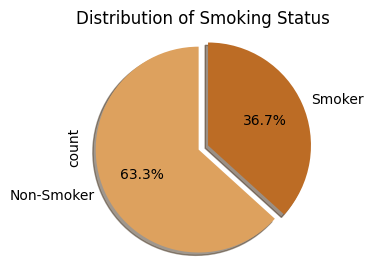

C:\Users\Zekiye\AppData\Local\Temp\ipykernel_35792\2238786437.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_label', data=df, palette={'Non-Smoker': '#dda15e', 'Smoker': '#bc6c25'})


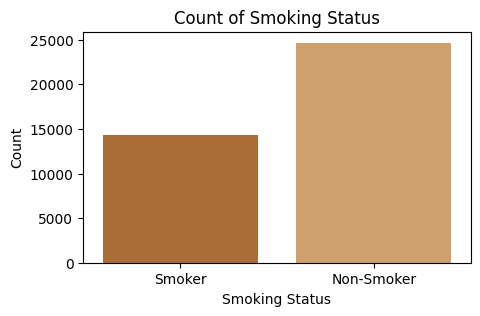

In [20]:
# Veri setindeki "smoking" sütununu 0 ve 1 değerlerine göre etiketleme
df['smoking_label'] = df['smoking'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Veri setinin içeriğini kontrol et
print(df['smoking_label'].value_counts())

# Pie Chart (Pasta Grafiği)
plt.figure(figsize=(3, 3))
df['smoking_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0, 0.1], shadow=True, colors=['#dda15e', '#bc6c25'])
plt.title('Distribution of Smoking Status')
plt.axis('equal')
plt.show()

# Countplot Grafiği
plt.figure(figsize=(5, 3))
sns.countplot(x='smoking_label', data=df, palette={'Non-Smoker': '#dda15e', 'Smoker': '#bc6c25'})
plt.title('Count of Smoking Status')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

# Eklenen sütunu veri setinden kaldırma
df.drop('smoking_label', axis=1, inplace=True)

Buradan anlıyoruz ki sigara içmeyenlerin sayısı, içenlerin sayısından fazla. Sınıflarımız dengeli bir dağılım göstermemiş gibi gözüküyor.

Veri setindeki her sayısal değişken için dört farklı türde grafik oluşturalım:

- Değişkenin sayısal dağılımı için histogram grafiği,
- Değişken ile hedef değişken(smoke) arasındaki ilişkiyi gösteren scatter plot
- Değişkenin merkezi eğilimini, dağılımını ve aykırı değerlerini gösteren bir kutu grafiği
- Değişkenin hedef değişken(smoke) kategorilerine göre ortalamasını gösteren bir çubuk grafiği

age


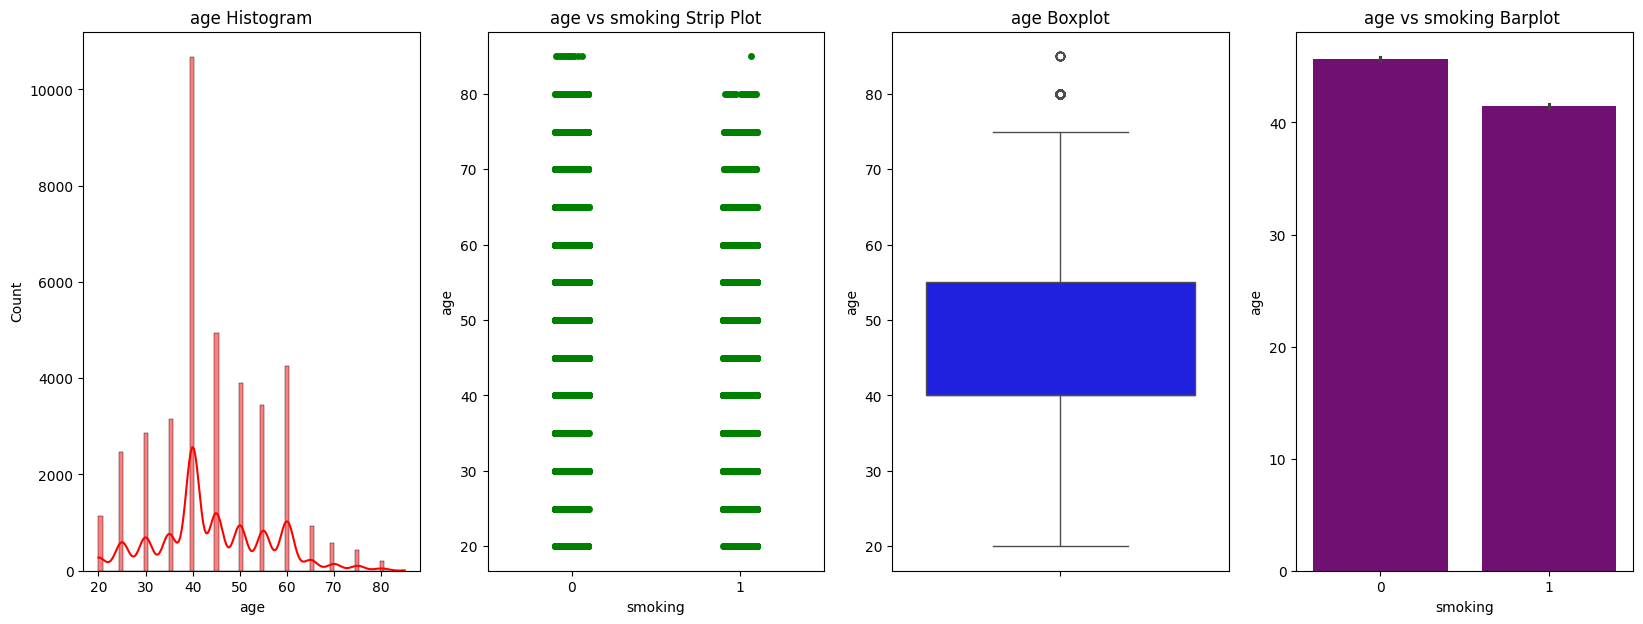

height(cm)


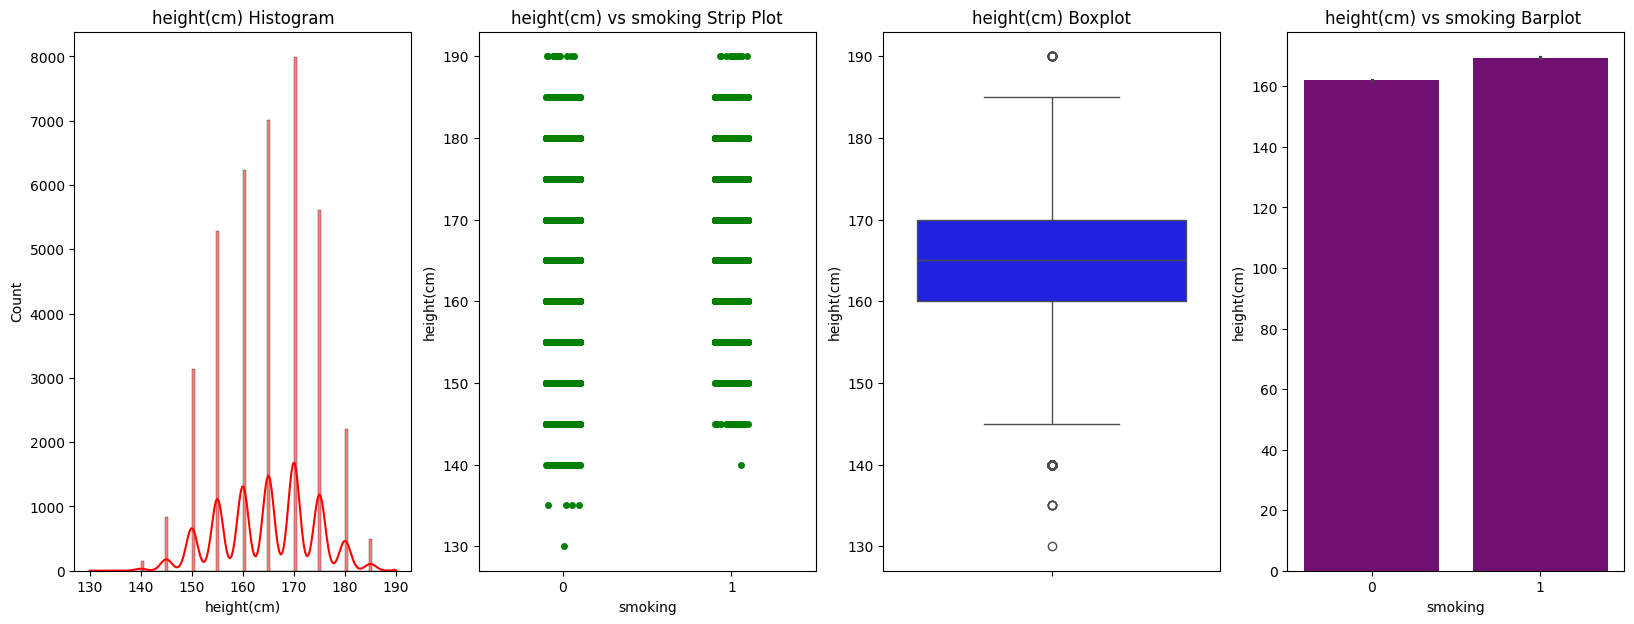

weight(kg)


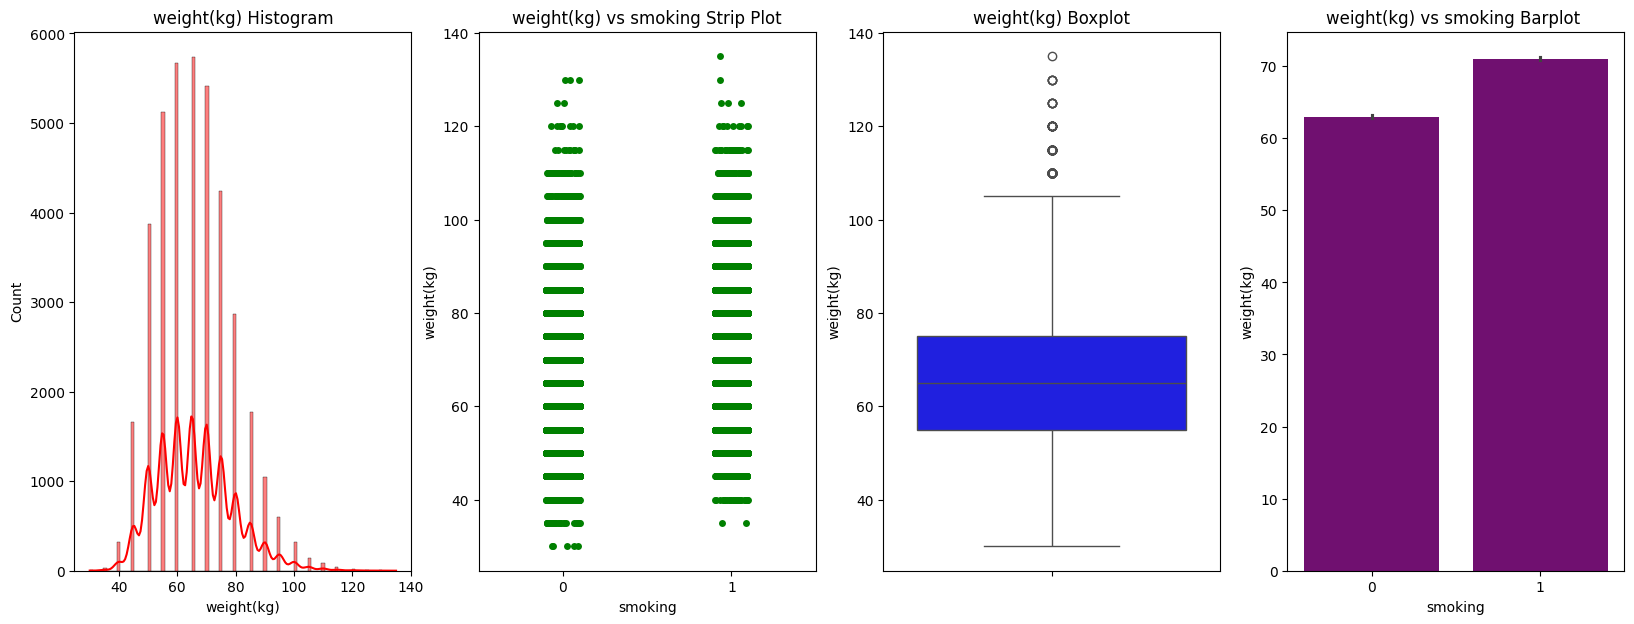

waist(cm)


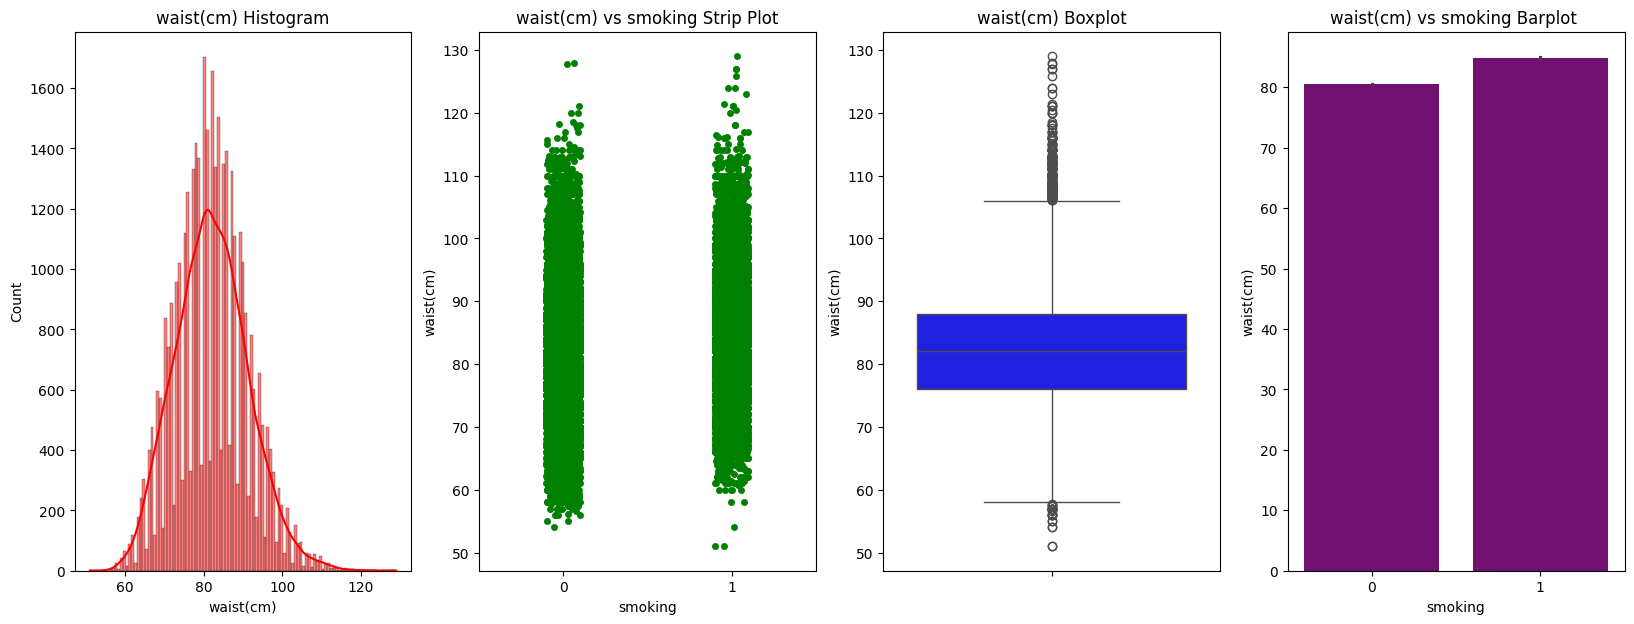

eyesight(left)


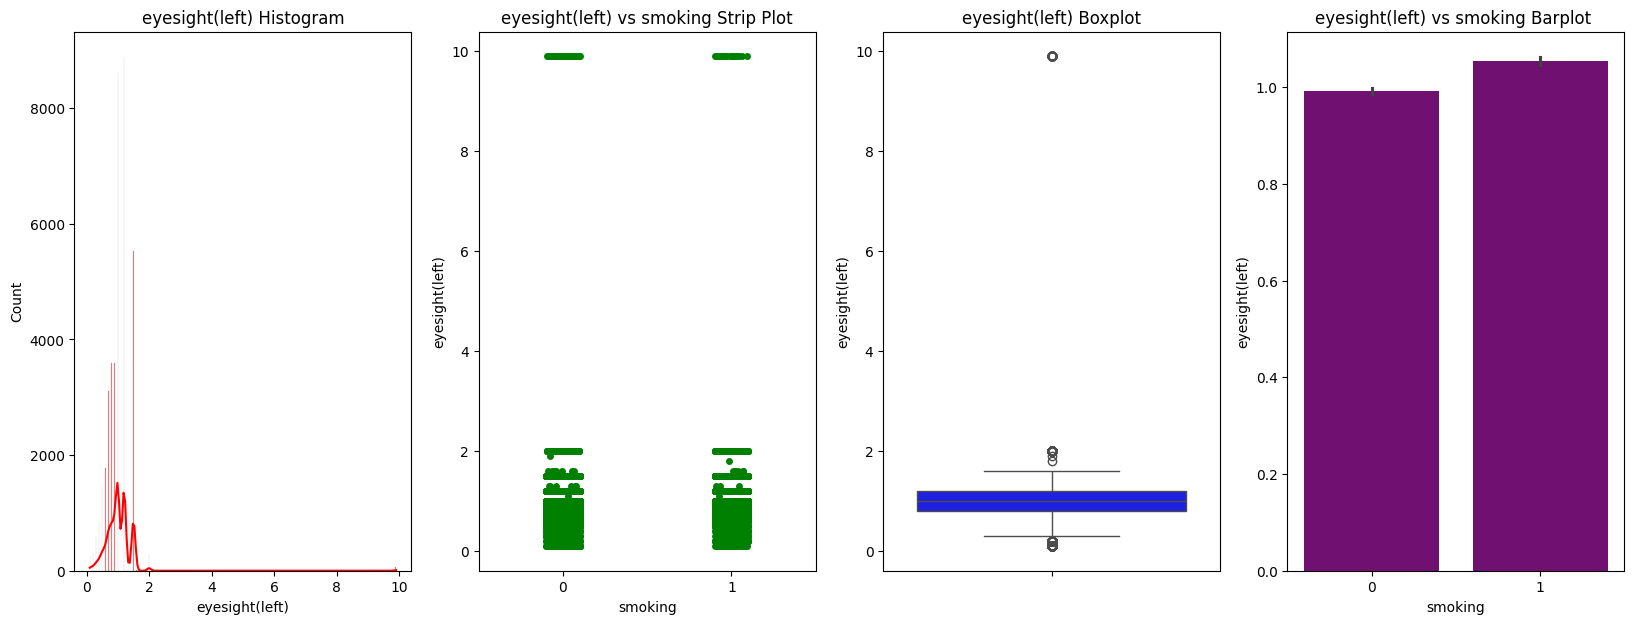

eyesight(right)


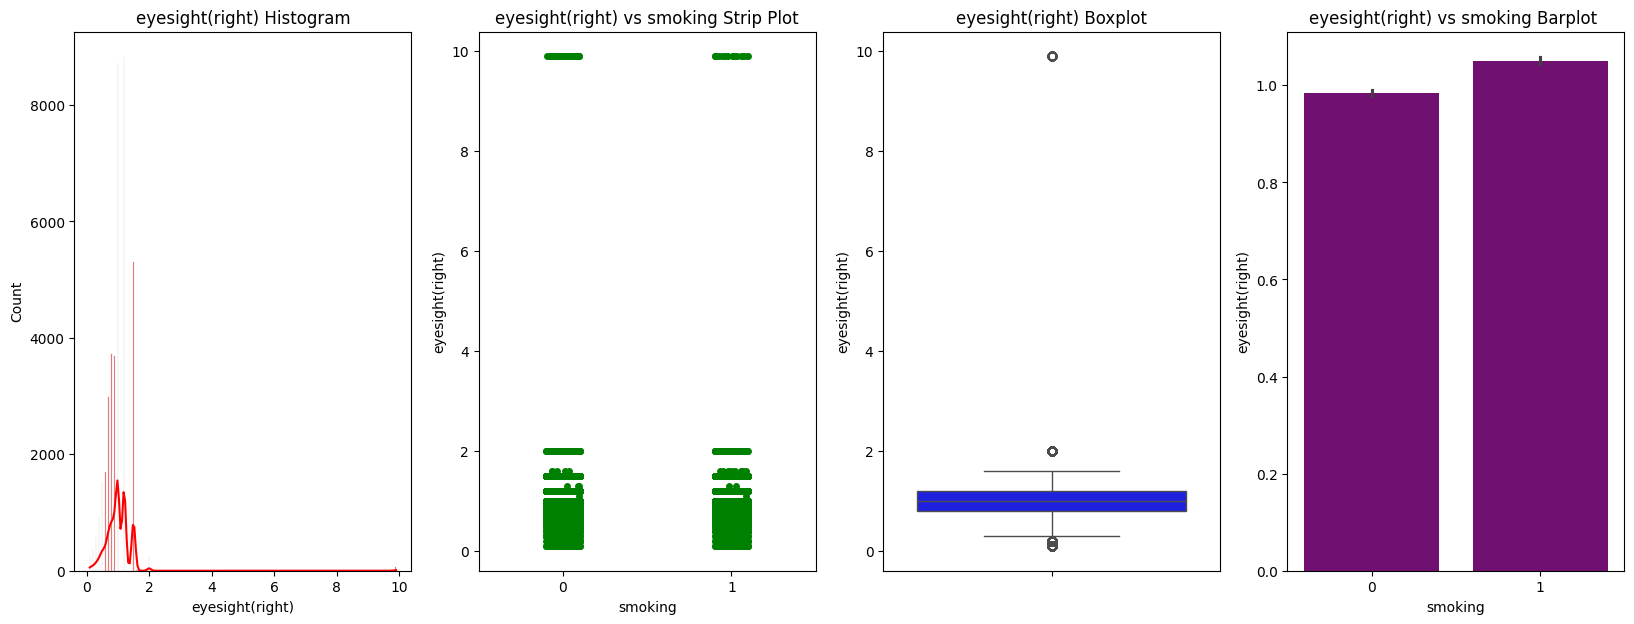

hearing(left)


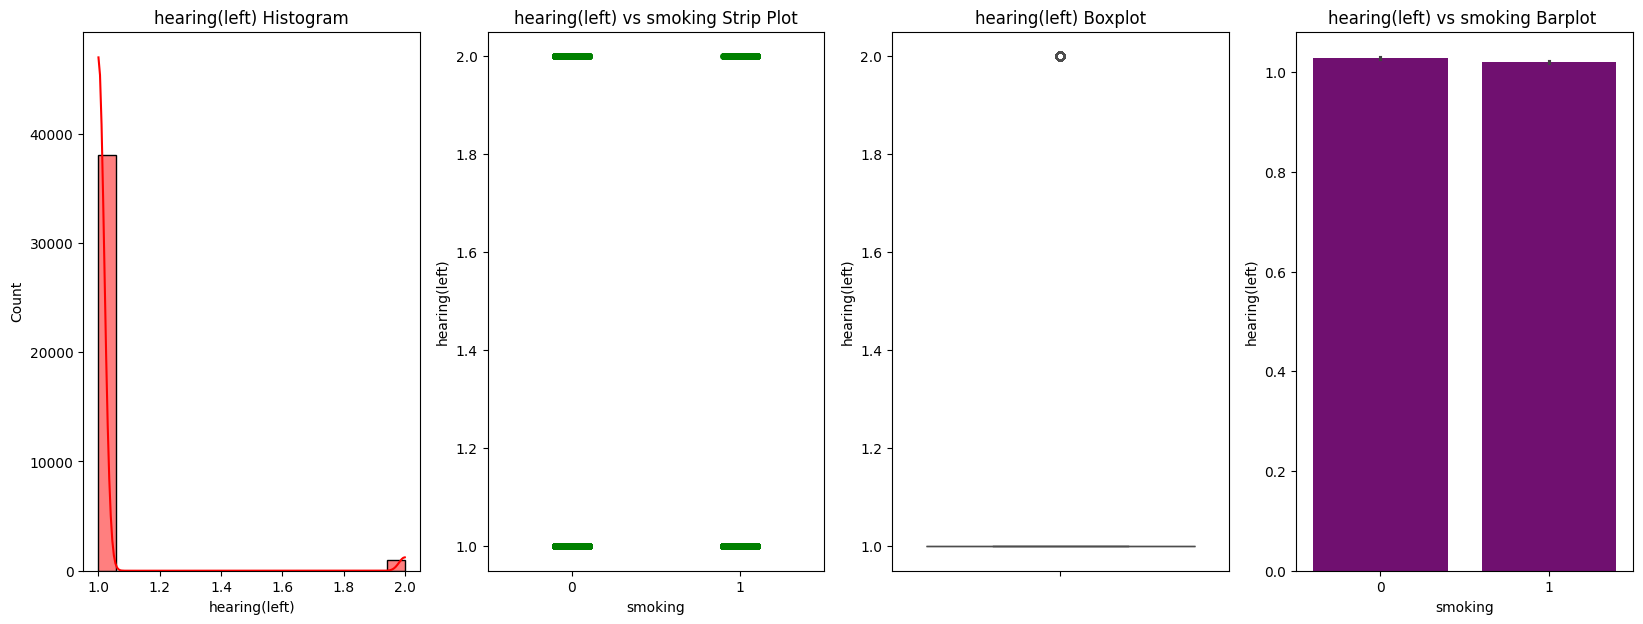

hearing(right)


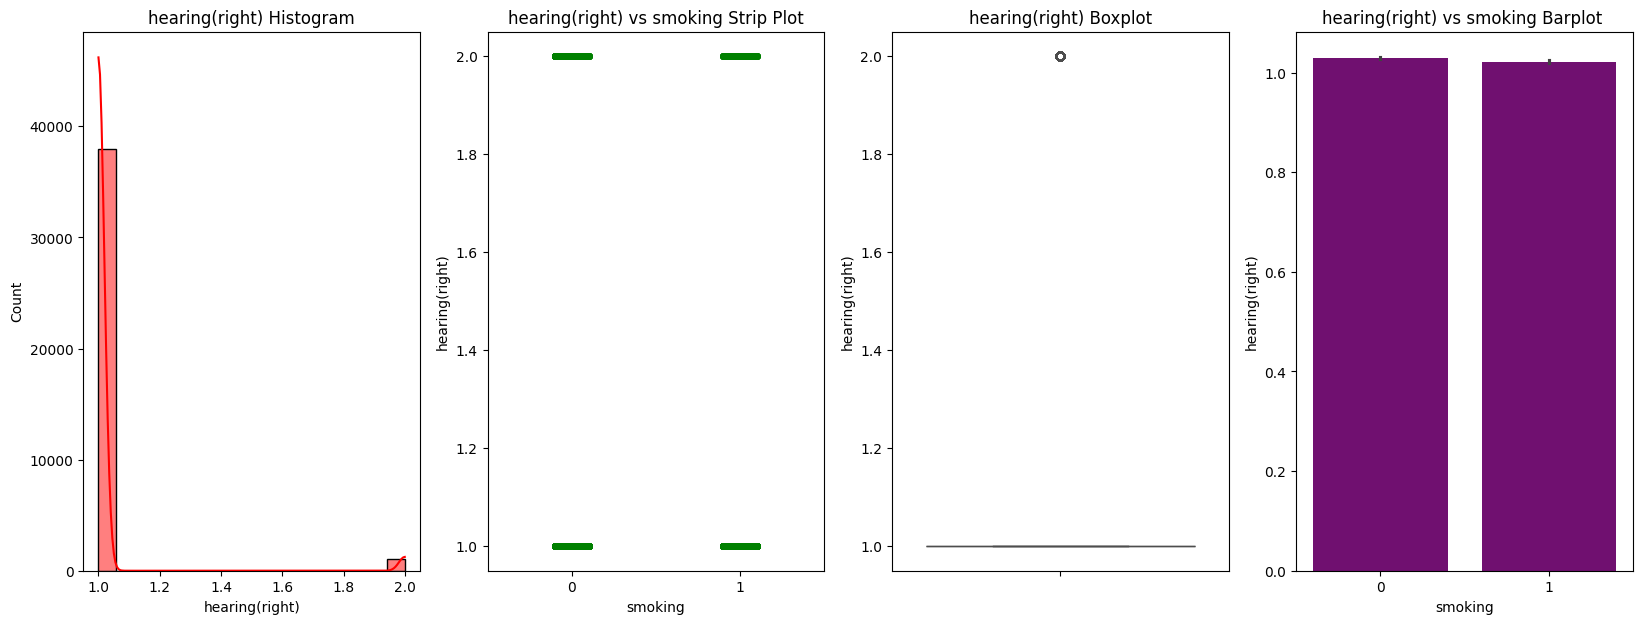

systolic


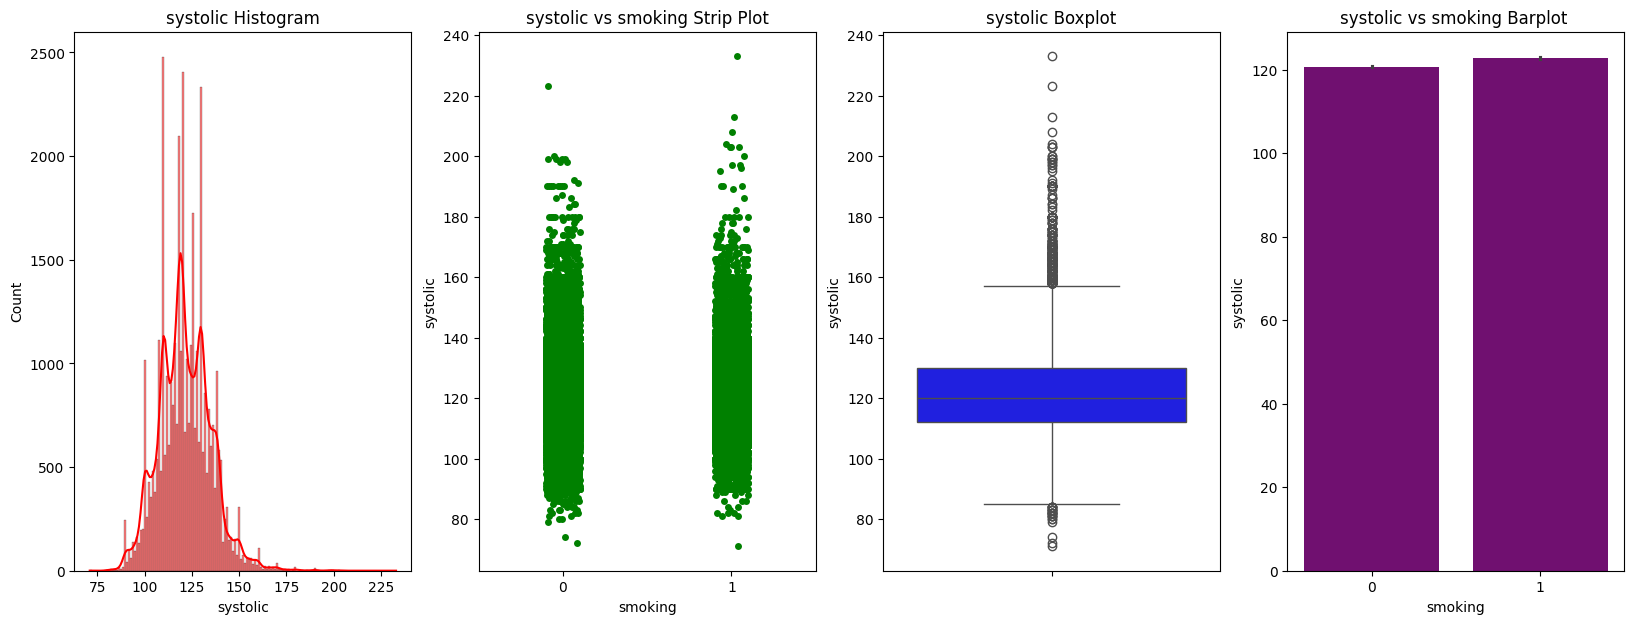

relaxation


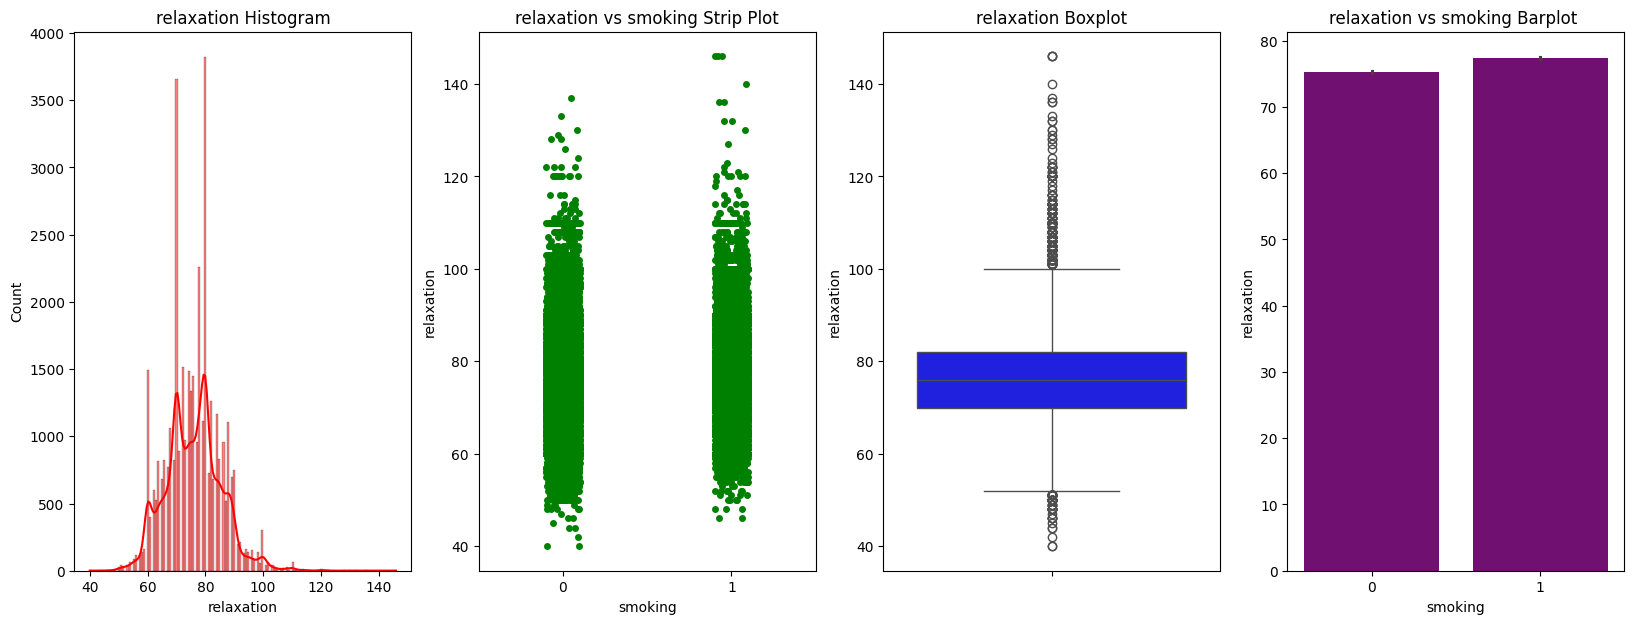

fasting blood sugar


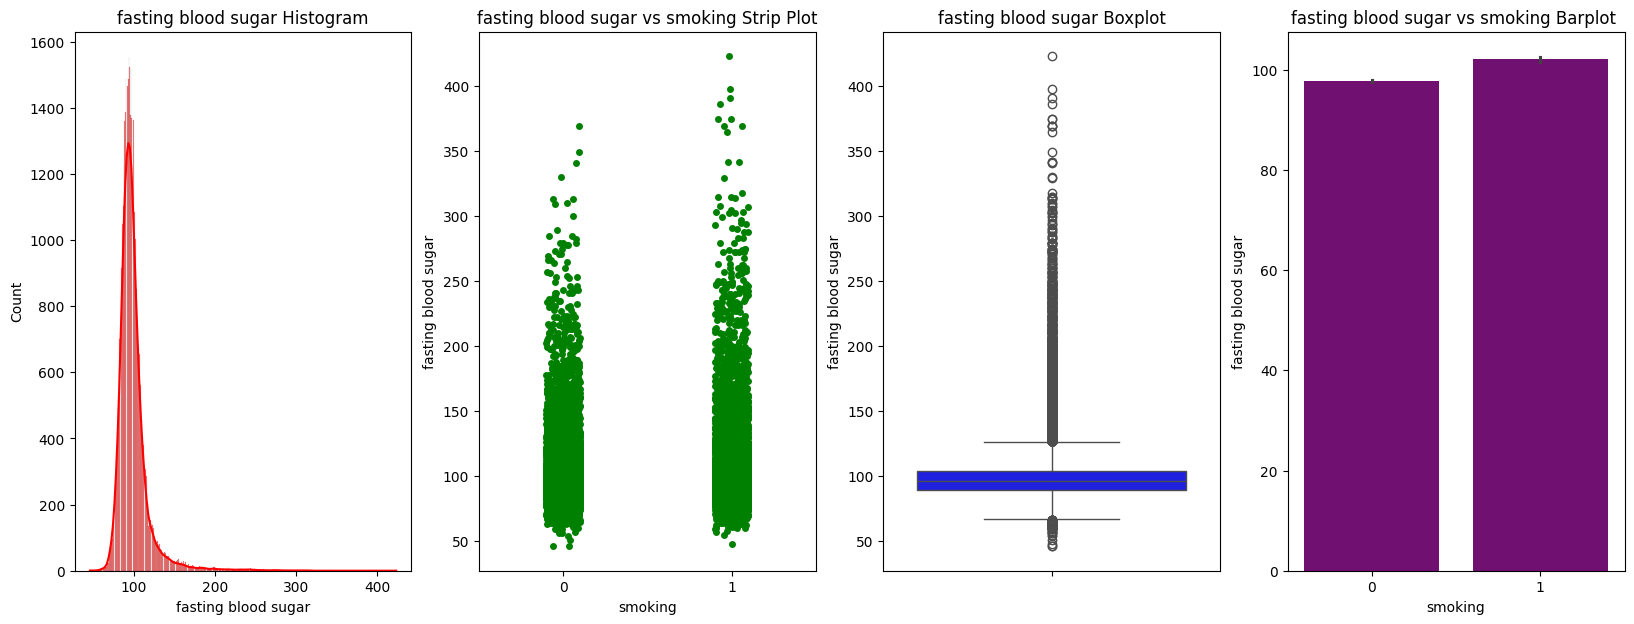

Cholesterol


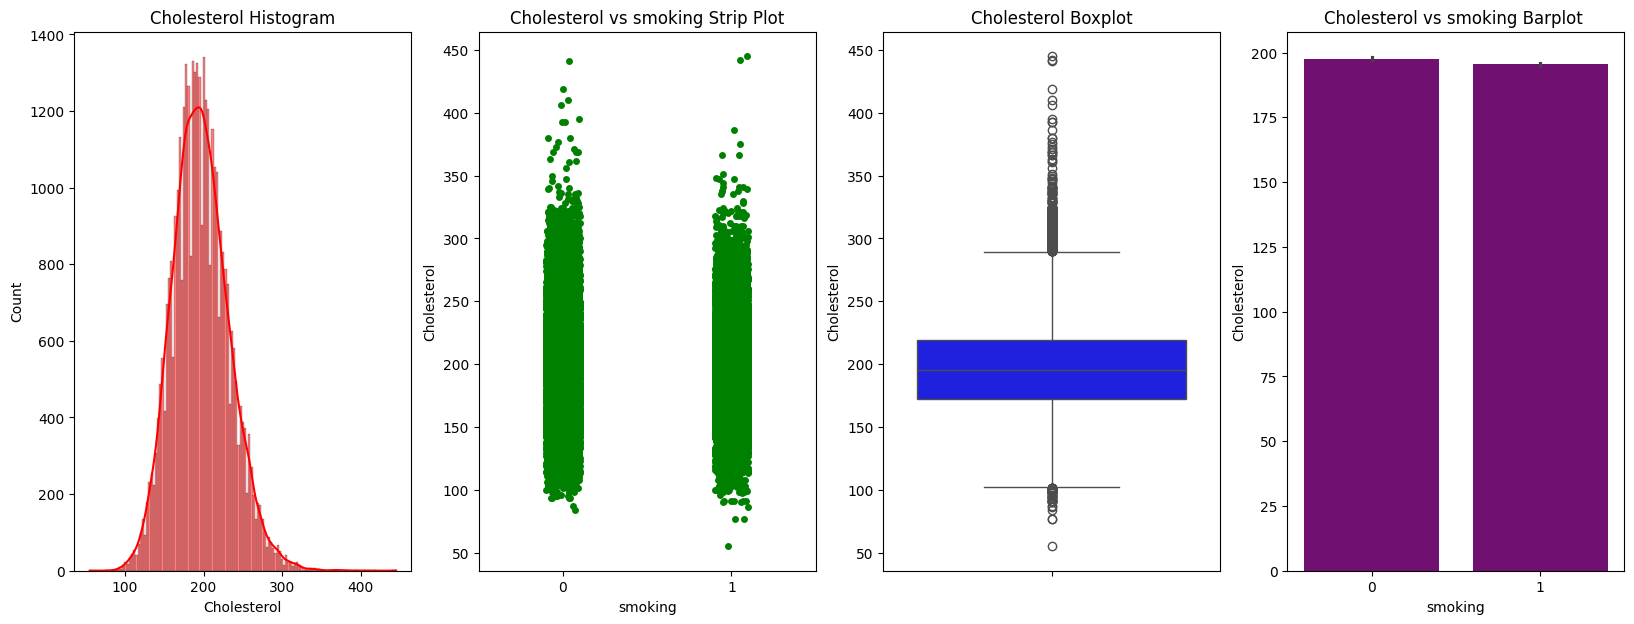

triglyceride


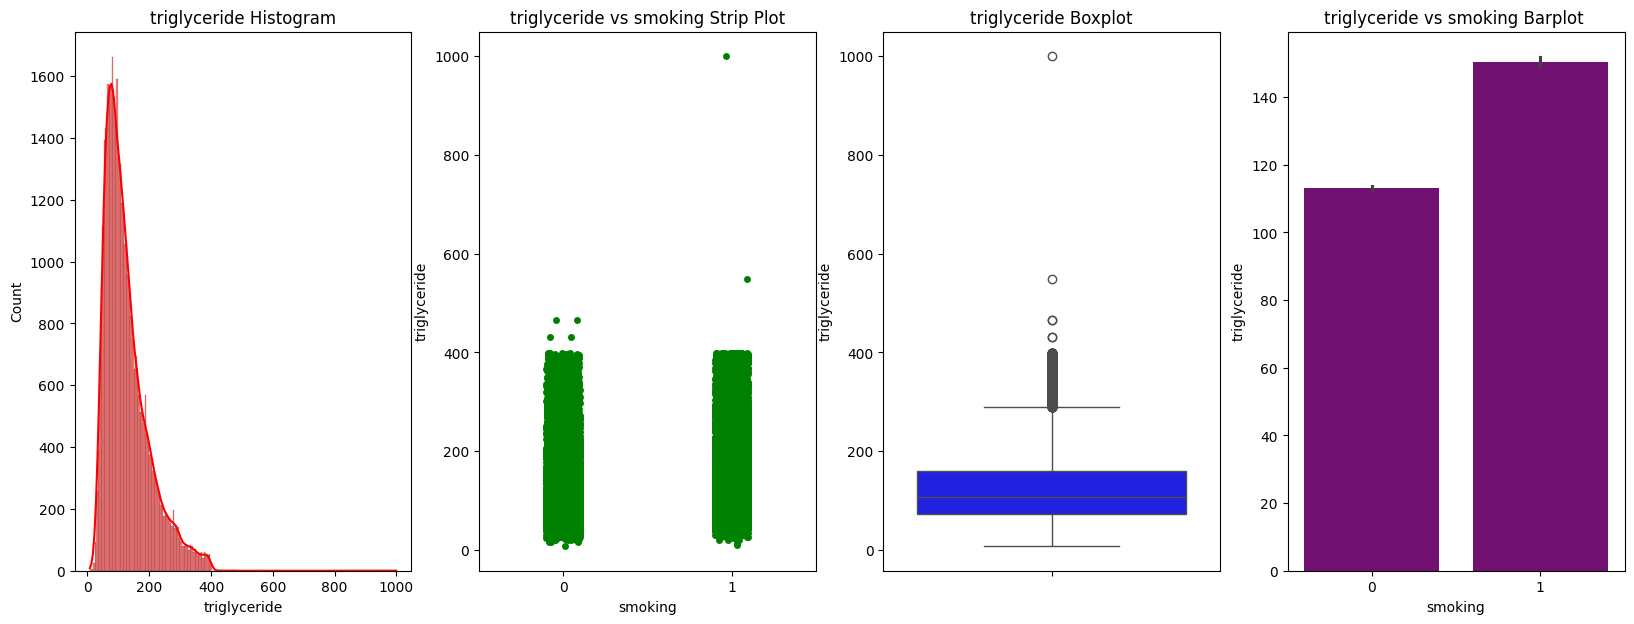

HDL


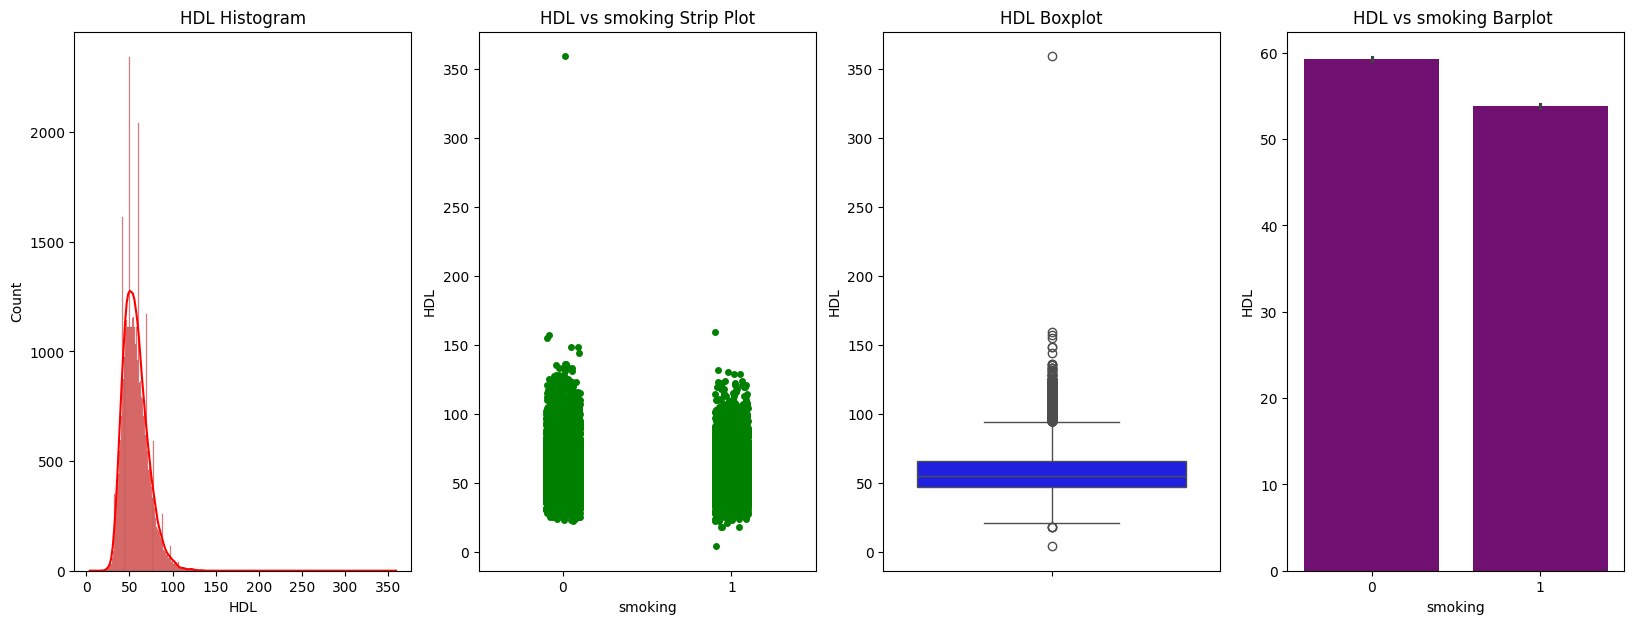

LDL


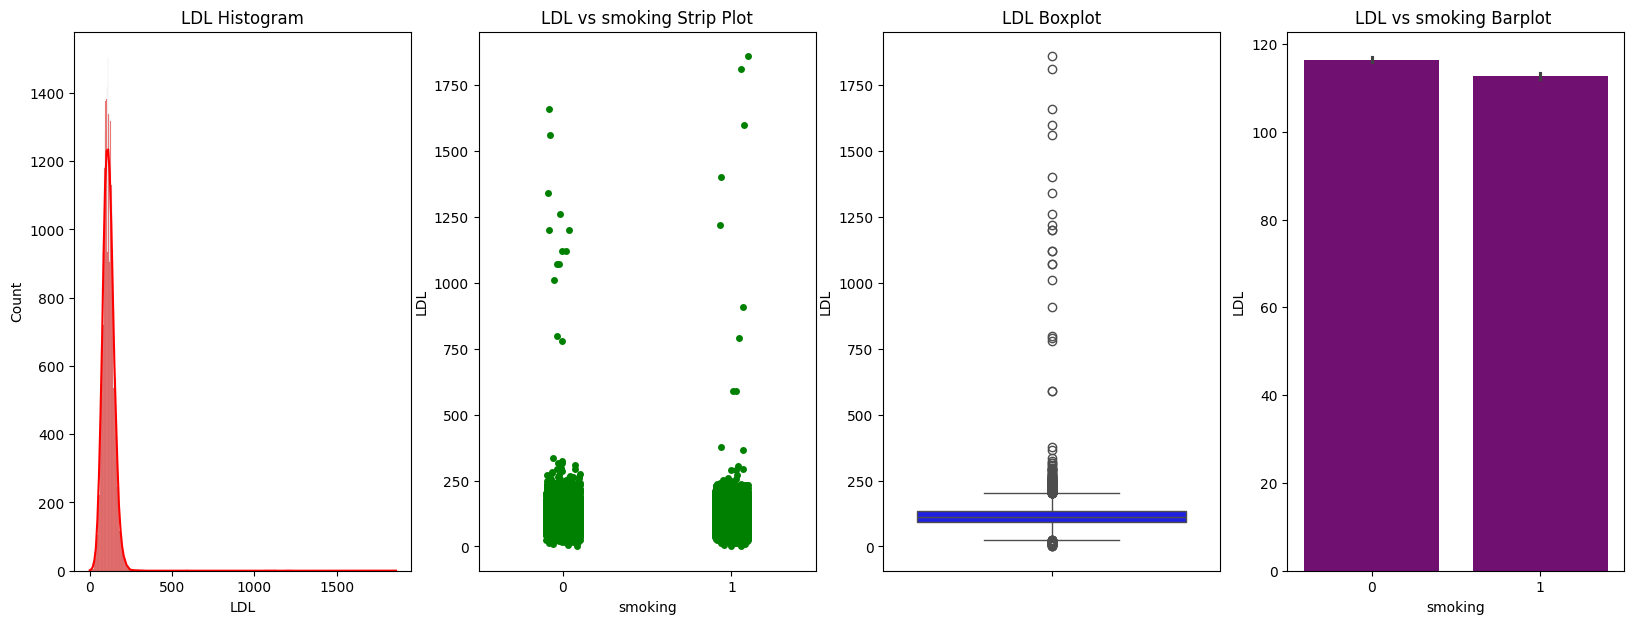

hemoglobin


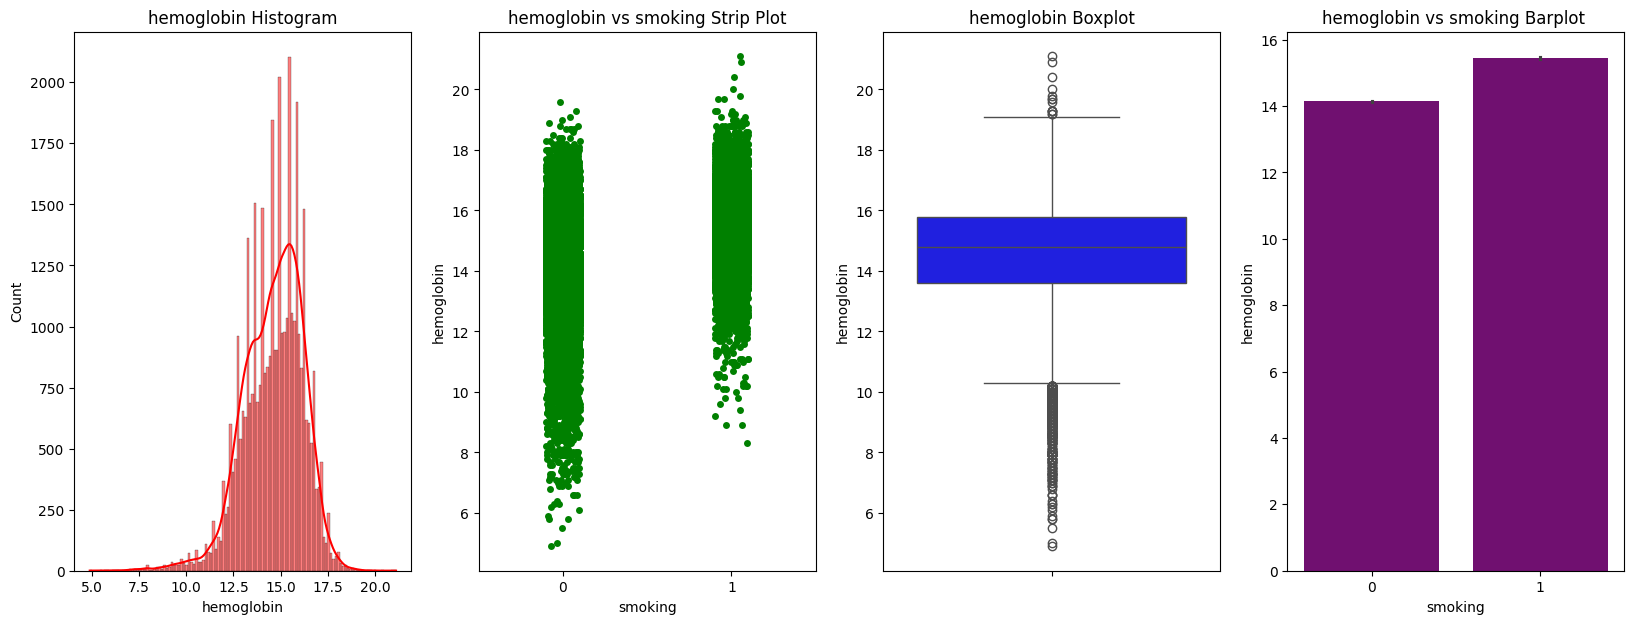

Urine protein


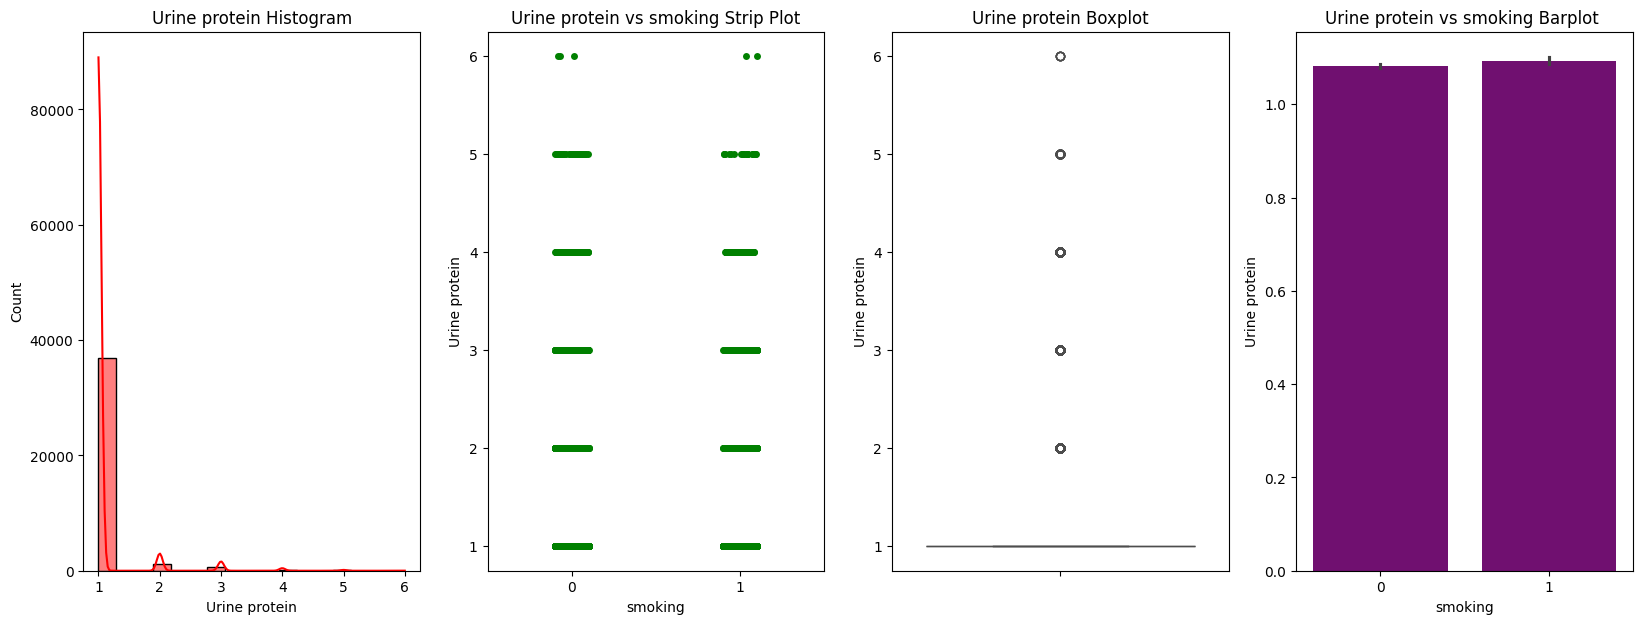

serum creatinine


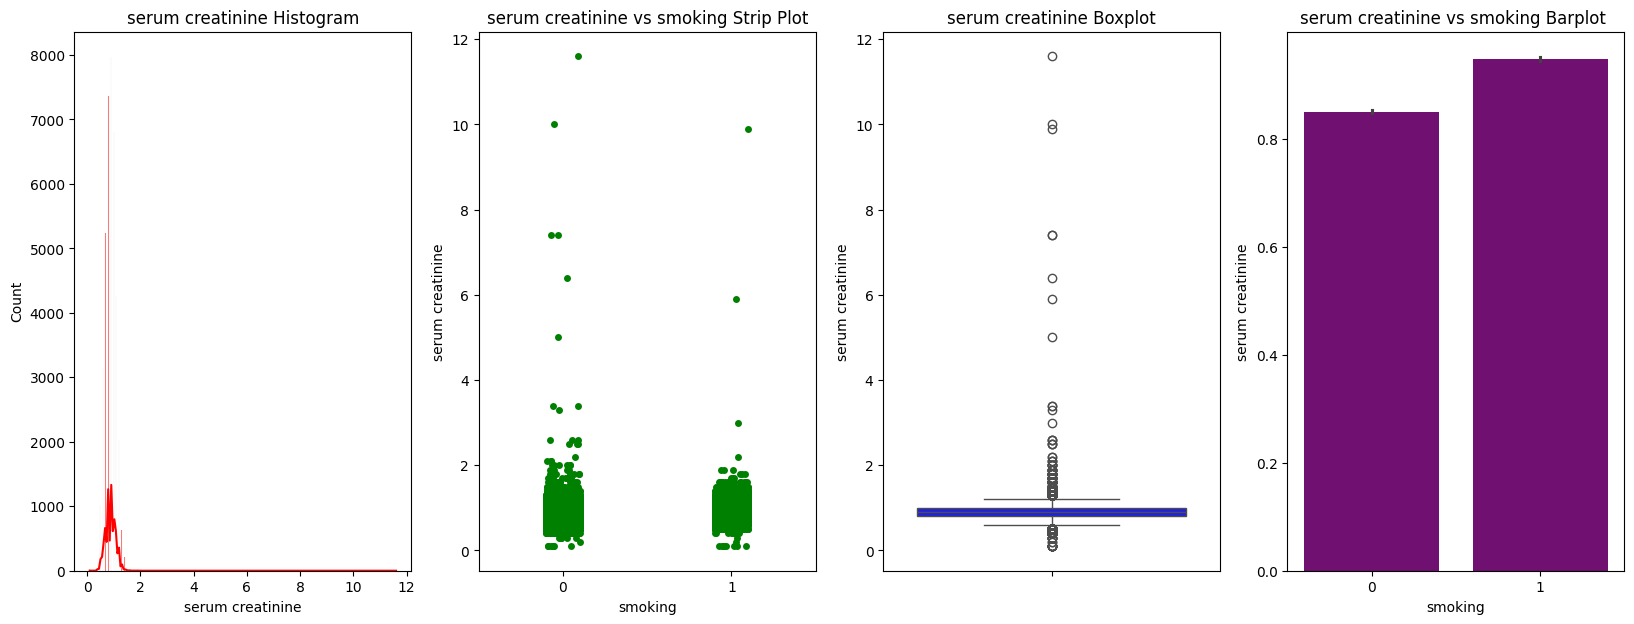

AST


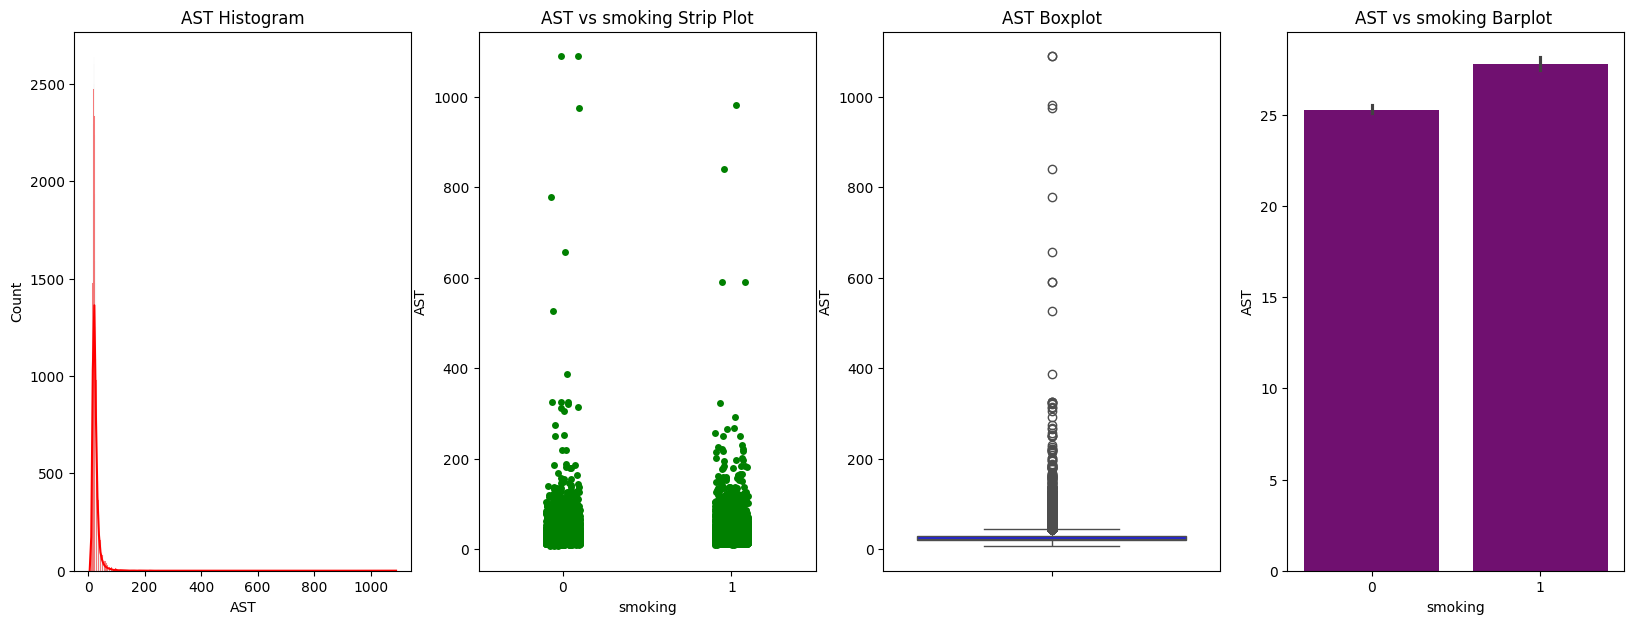

ALT


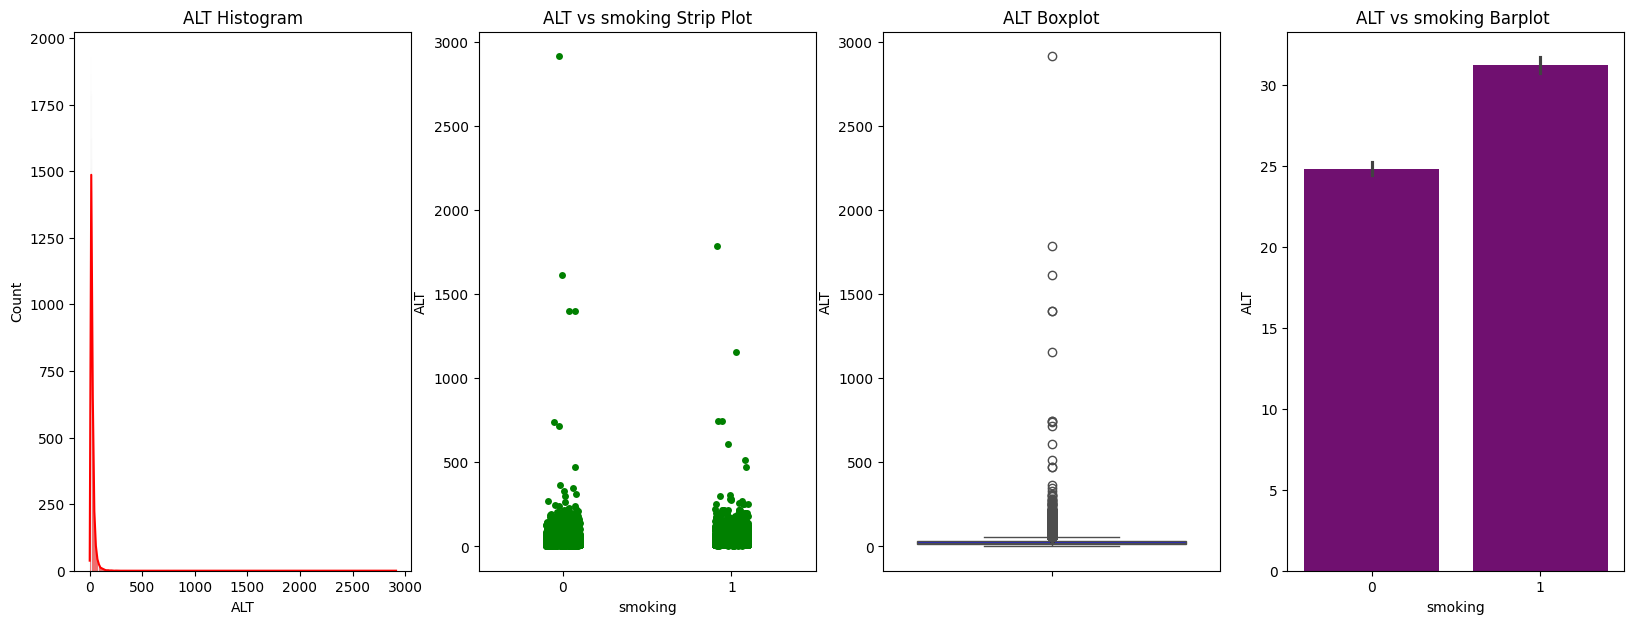

Gtp


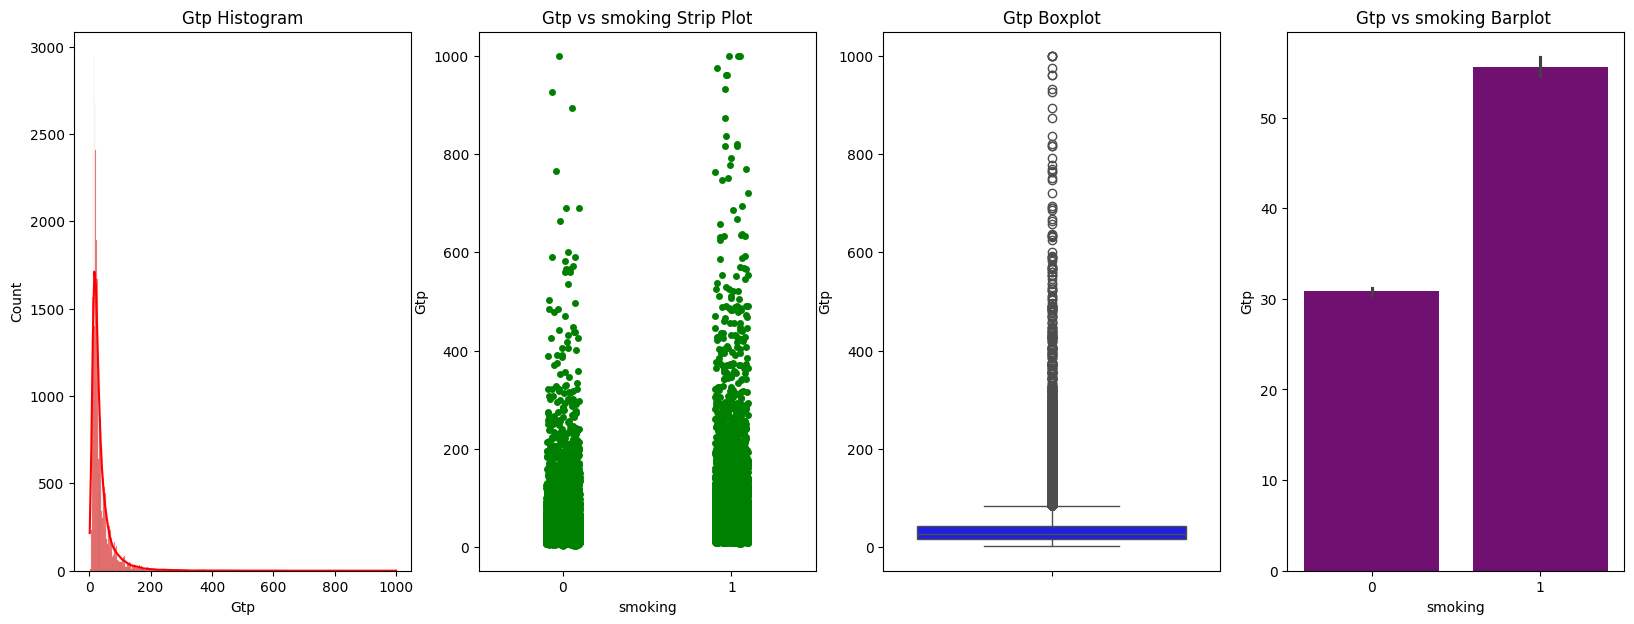

dental caries


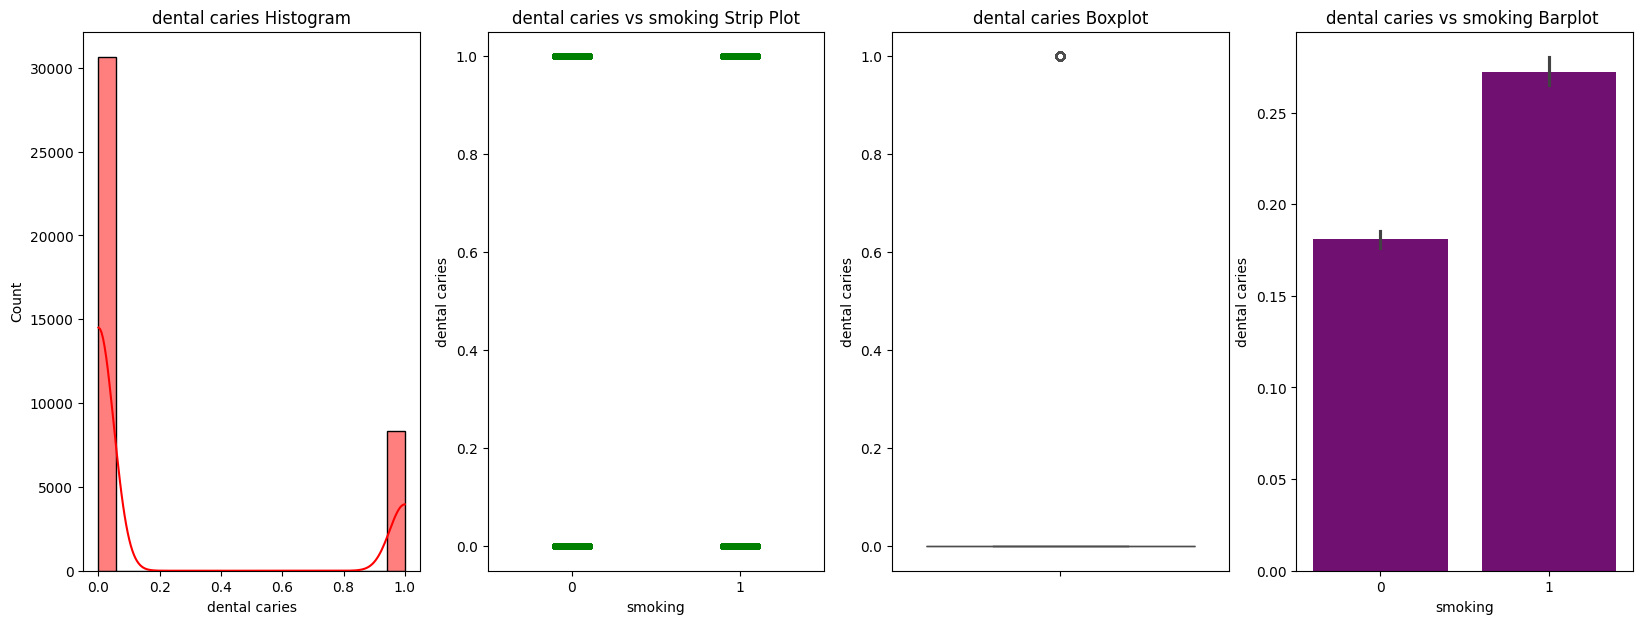

In [21]:
def diagnostic_plots(df, variable, target):
    # Check if the variable name contains "_category"
    if "_category" in variable or variable == target:
        pass
    
    else:

        # histogram
        plt.figure(figsize=(20, 7))
        plt.subplot(1, 4, 1)
        sns.histplot(df[variable], kde=True, color='r')
        plt.title(f'{variable} Histogram')

        # strip plot
        plt.subplot(1, 4, 2)
        sns.stripplot(x=df[target], y=df[variable], color='g', jitter=True)
        plt.title(f'{variable} vs {target} Strip Plot')

        # boxplot
        plt.subplot(1, 4, 3)
        sns.boxplot(y=df[variable], color='b')
        plt.title(f'{variable} Boxplot')

        # barplot
        plt.subplot(1, 4, 4)
        sns.barplot(x=df[target], y=df[variable], color='purple')
        plt.title(f'{variable} vs {target} Barplot ')

        plt.show()

# df ve sns import edildiğini varsayalım
for col in df.columns[:-1]:
    print(col)
    diagnostic_plots(df, col, 'smoking')


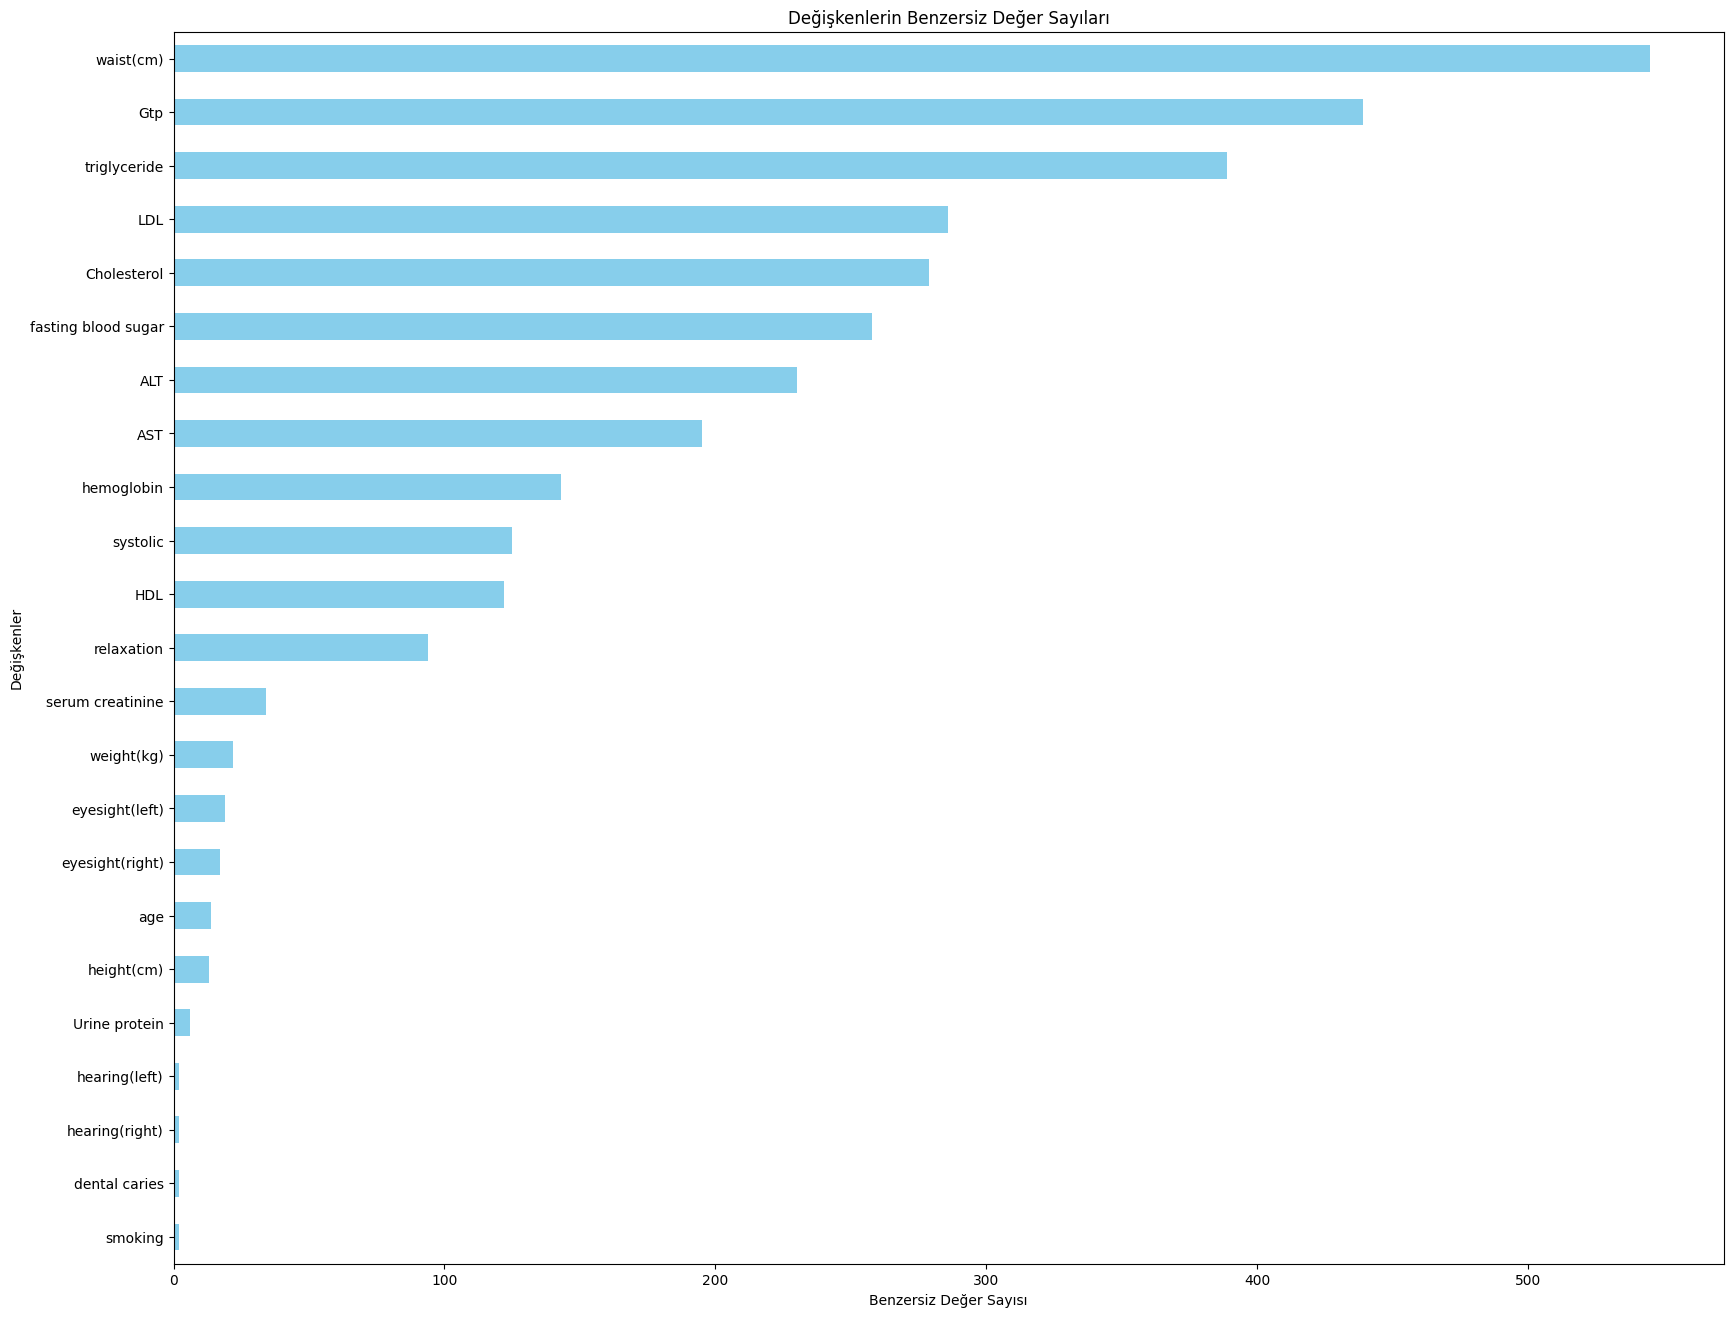

In [22]:
# Değişkenlerin benzersiz değer sayılarını hesapla ve ters çevirelim
variable_unique_counts = df.nunique().sort_values(ascending=True)

# Grafik çizimi
plt.figure(figsize=(20, 16))
variable_unique_counts.plot(kind='barh', color='skyblue')  # 'barh' kullanarak yatay çubuk grafik oluşturalım
plt.title('Değişkenlerin Benzersiz Değer Sayıları')
plt.xlabel('Benzersiz Değer Sayısı')
plt.ylabel('Değişkenler')
plt.show()

Önceki adımlarda analiz ettiğimiz her bir özelliğin veri skalasının genişliğini görselleştirerek de görmüş oluyoruz.

Yaş Dağolımı sigara içen - içmeyen arasında daha ayrıntılı hali:

C:\Users\Zekiye\AppData\Local\Temp\ipykernel_35792\1401359088.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoking', y=variable, data=df, palette='viridis')
C:\Users\Zekiye\AppData\Local\Temp\ipykernel_35792\1401359088.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoking', y=variable, data=df, palette='muted')


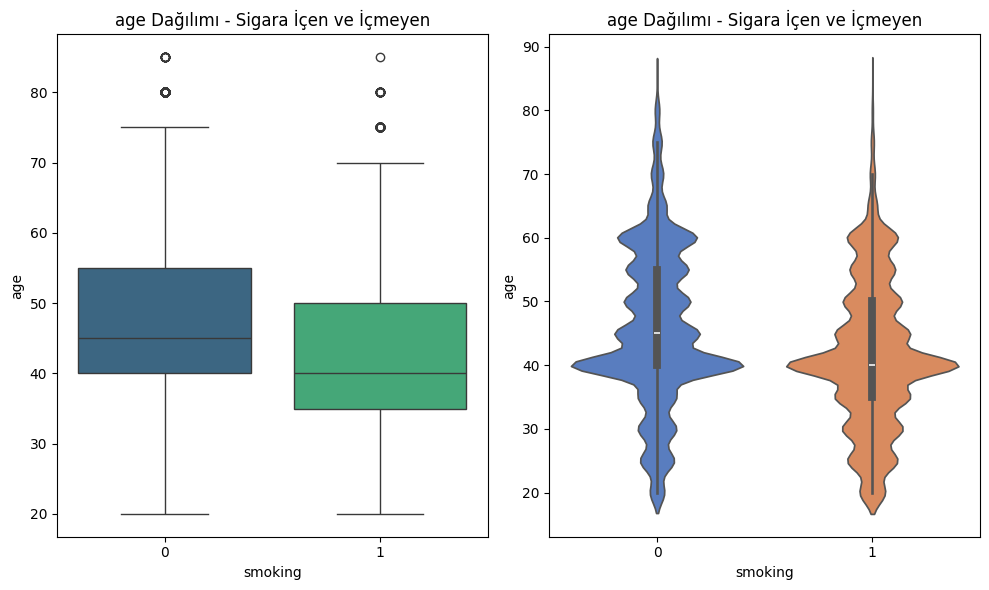

In [23]:
def smoking_distribution_plot(df, variable):
    plt.figure(figsize=(10, 6))

    # Boxplot
    plt.subplot(1, 2, 1)
    sns.boxplot(x='smoking', y=variable, data=df, palette='viridis')
    plt.title(f'{variable} Dağılımı - Sigara İçen ve İçmeyen')

    # Violinplot
    plt.subplot(1, 2, 2)
    sns.violinplot(x='smoking', y=variable, data=df, palette='muted')
    plt.title(f'{variable} Dağılımı - Sigara İçen ve İçmeyen')

    plt.tight_layout()
    plt.show()


smoking_distribution_plot(df, 'age')

Görüyoruz ki genel olarak 40 yaşındaki insanlarda yoğunlaşılmış

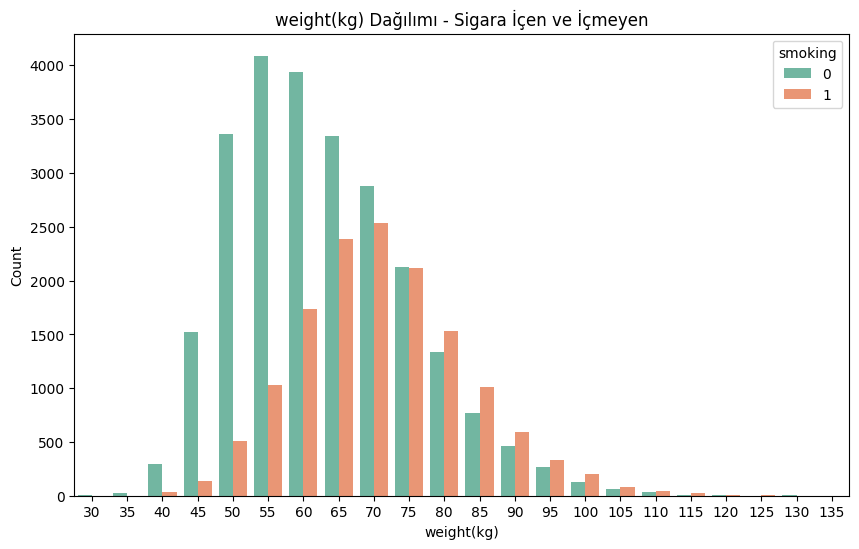

In [24]:
def smoking_barplot(df, variable):
    plt.figure(figsize=(10, 6))

    sns.countplot(x=variable, hue='smoking', data=df, palette='Set2')
    plt.title(f'{variable} Dağılımı - Sigara İçen ve İçmeyen')
    plt.xlabel(variable)
    plt.ylabel('Count')

    plt.show()


smoking_barplot(df, 'weight(kg)')

Aralarında en az fark olan grup 75 kg grubudur. Bu da demek oluyor ki veri setinde 75 kg olan insanlar ağırlıklarına bakılarak tahmin edilmesi zor olabilir. Aynı şekilde 75 kg ve sonrasındaki ağırlıklar arasında sigara içen ve içmeyen arasında az farklar vardır. Bu aralıklarda tahmin zor olabilir

Diğer yandan 75 kg öncesindeki verilerde içmeyenlerin daha fazla olduğu gözlemleniyor. Yani 75 kg ve sonrasındaki ağırlıklarda sigara içme oranı daha yüksek.

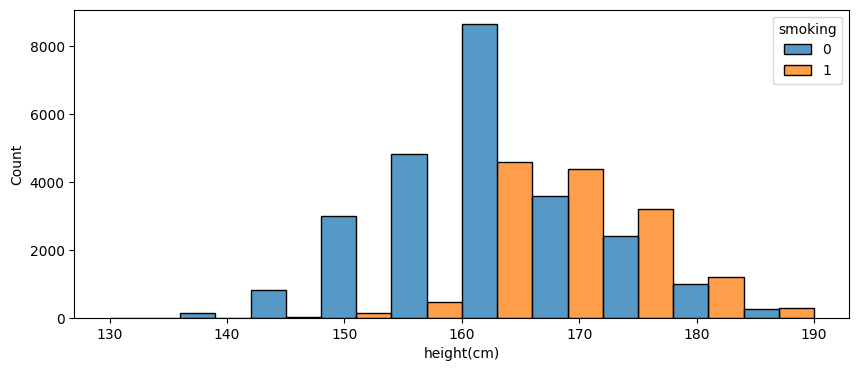

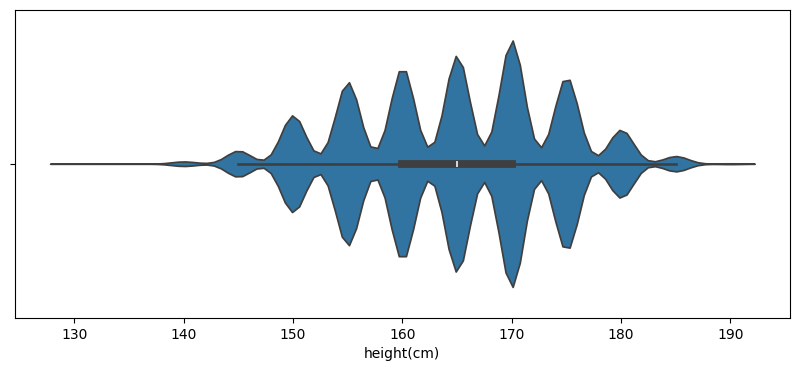

In [25]:
fig, ax= plt.subplots(figsize=(10, 4))
fig1, ax1= plt.subplots(figsize=(10, 4))

sns.histplot(data=df, x="height(cm)", hue="smoking", multiple="dodge", bins=10, ax = ax)

sns.violinplot(data=df, x="height(cm)",ax=ax1)

plt.show()

sigara içen bireyler arasında 160-180 boy aralığı daha yaygın olduğu gözlemleniyor. Dolayısıyla boy(cm) ile sigara içme arasında anlamlı miktarda pozitif doğrusal bir ilişki vardır.

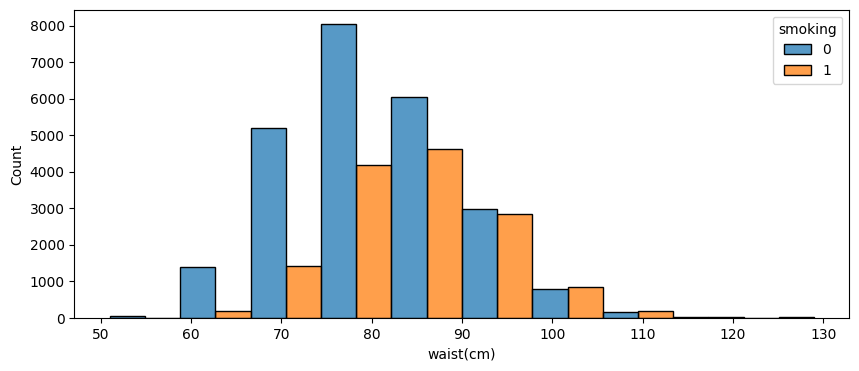

In [26]:
fig, ax = plt.subplots(1, figsize=(10, 4))
sns.histplot(data=df, x="waist(cm)", hue="smoking", multiple="dodge", bins=10, ax=ax)
plt.show()

Bel ölçükleri yükseldikçe sigara içen ile içmeyen arasındaki fark azalıyordur.

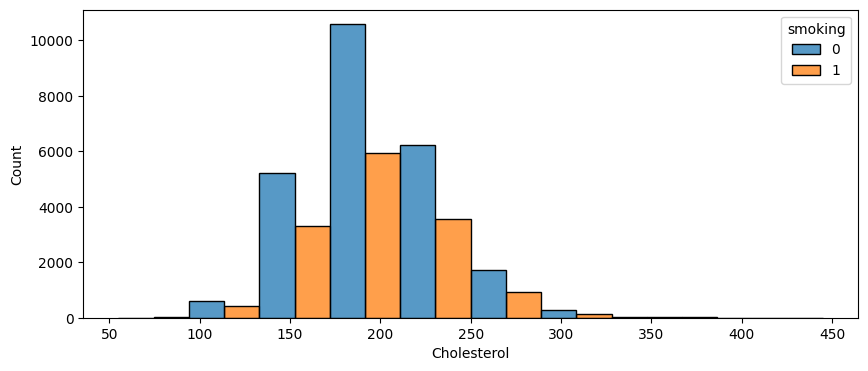

In [27]:
fig, ax = plt.subplots(1, figsize=(10, 4))
sns.histplot(data=df, x="Cholesterol", hue="smoking", multiple="dodge", bins=10, ax=ax)
plt.show()

Sigara içenlerin arasında en çok 200 birime sahip olanları görüyoruz

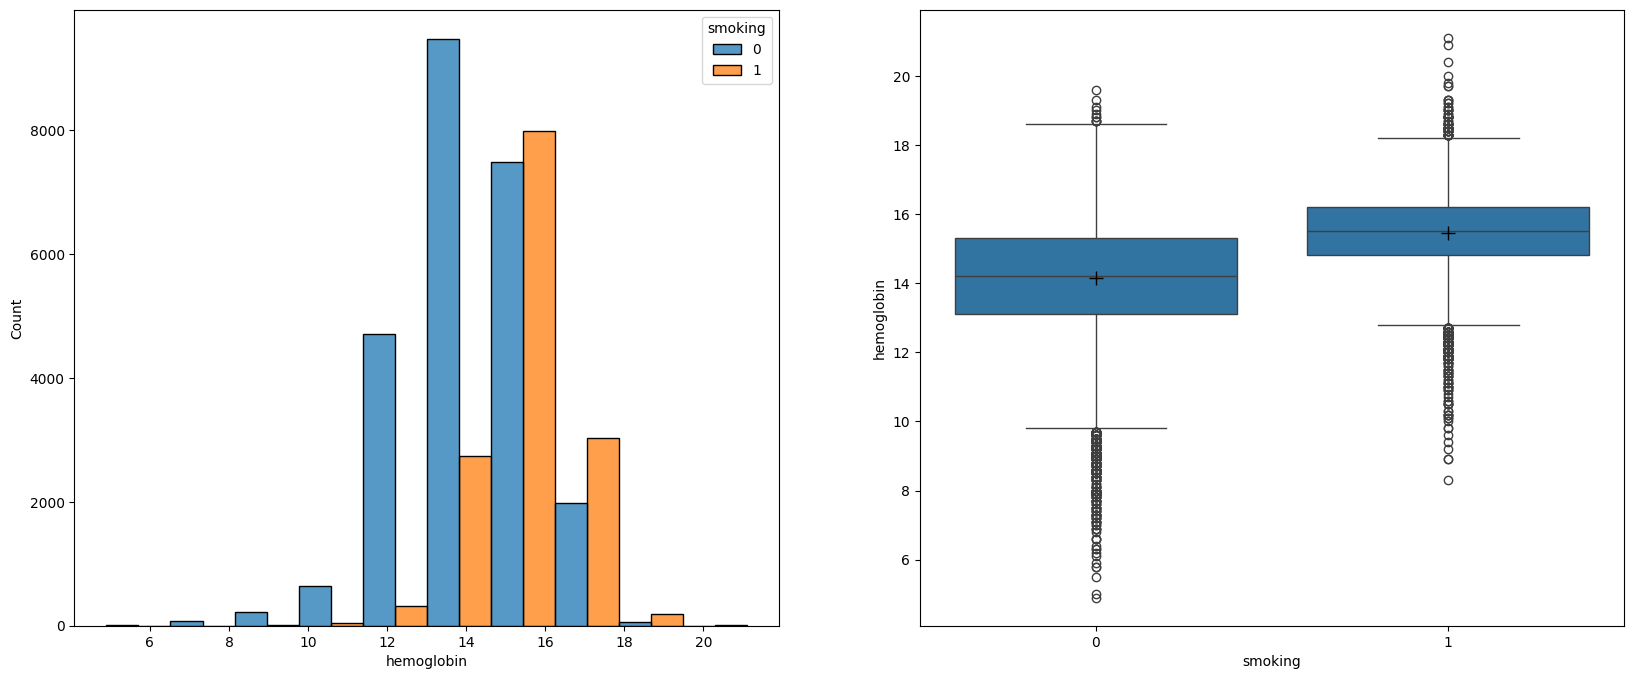

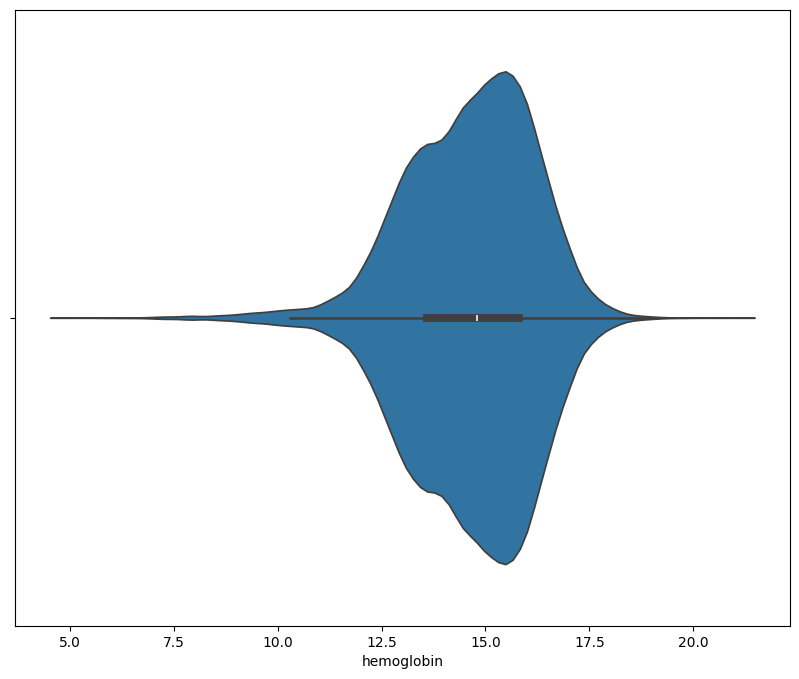

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
fig1, ax1 = plt.subplots(figsize=(10, 8))

sns.histplot(data=df, x="hemoglobin", hue="smoking", multiple="dodge", bins=10, ax=ax[0])
sns.boxplot(data=df, y="hemoglobin", x="smoking", ax=ax[1], showmeans=True,
            meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"})

sns.violinplot(data=df, x="hemoglobin", ax=ax1)

plt.show()

Sigara içme alışkanlığıyla en belirgin pozitif doğrusal ilişkiyi hemoglobin seviyelerinde gözlemliyoruz.

Hemoglobin seviyeleri ile günlük sigara tüketimi arasında artan bir eğilim gözlemleniyor, özellikle ortalama hemoglobin düzeyleri ile karboksihemoglobin düzeyleri arasında. Sigara içen bireylerin hemoglobin dağılım eğrisinde genel olarak yukarı doğru bir kayma meydana geliyor gibi görünüyor. Bu durum, hemoglobin seviyelerinin anemiyi tespit etme yeteneğinde bir azalmaya işaret edebilir. Aynı zamanda, karboksihemoglobin düzeylerinin artması, hemoglobin ayrışma eğrisini sola kaydırarak dokulara oksijen taşıma kapasitesini azaltabilir.

Kutu grafiği incelendiğinde, aykırı değerlerin sayısının oldukça fazla olduğu görülmektedir.

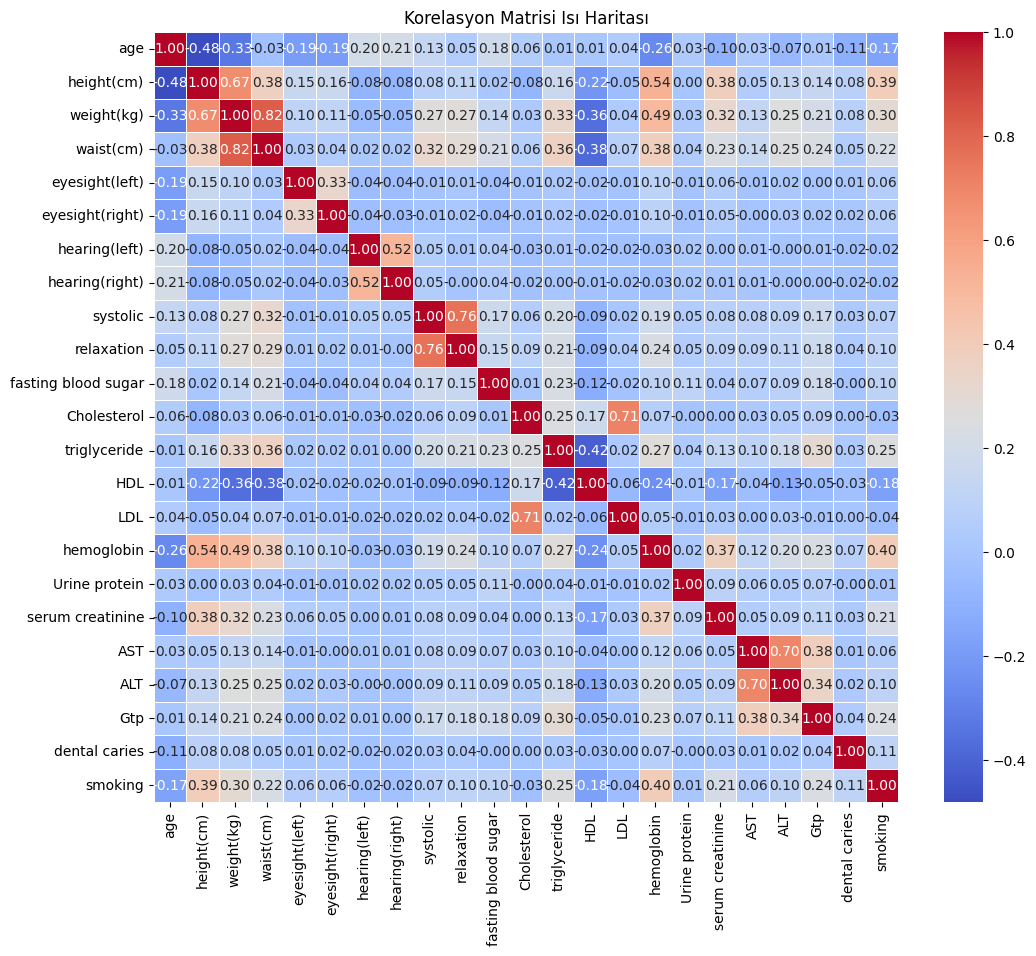

In [29]:
# Veri setinizdeki korelasyon matrisini hesaplayın
correlation_matrix = df.corr()

# Korelasyon matrisinin ısı haritasını çizin
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasyon Matrisi Isı Haritası')
plt.show()

Görüyoruz ki;

+ Hemoglobin sigara içmeyle maksimum pozitif doğrusal korelasyona sahiptir ve bu da mantıklıdır.
+ HDL sigara içmeyle en yüksek negatif doğrusal korelasyona sahiptir.
+ yaşın sigara içmeyle negatif doğrusal bir ilişkisi vardır.

## Veri Temizliği ve Normalizasyonu

### Aykırı Değerler için Z-Score uygulaması

Z skor sonucu 3ten fazla olan verileri eleyelim. Çünkü 3 ten sonrası büyük bir aykırılık olabilir.

In [30]:
df_filter = df[np.abs(stats.zscore(df) < 3).all(axis=1)]
df_filter

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,39,102,16.5,1,1.0,19,22,19,0,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,58,99,14.0,2,1.4,29,20,32,1,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,...,60,104,12.9,2,0.7,17,17,14,0,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,...,41,107,13.1,1,0.6,22,15,56,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,79,91,16.1,1,0.9,28,43,36,1,1
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,61,72,12.3,1,0.5,18,18,21,1,0
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,76,131,12.5,2,0.6,23,11,12,0,0
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,79,116,12.0,1,0.6,24,20,17,0,1


### Normalizasyon

In [31]:
X= df_filter.drop(columns=["smoking"])
y= df_filter.smoking

In [32]:
X

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,200,47,92,14.9,1,1.2,26,28,15,0
6,40,175,90,95.0,0.9,1.0,1,1,130,88,...,331,39,102,16.5,1,1.0,19,22,19,0
7,40,180,75,85.0,1.5,1.5,1,1,110,60,...,62,58,99,14.0,2,1.4,29,20,32,1
8,40,170,60,74.0,1.2,1.5,1,1,89,57,...,69,60,104,12.9,2,0.7,17,17,14,0
9,45,155,55,78.0,0.7,1.0,1,1,114,81,...,177,41,107,13.1,1,0.6,22,15,56,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38978,40,170,65,77.0,1.5,1.5,1,1,110,62,...,84,79,91,16.1,1,0.9,28,43,36,1
38979,40,165,60,80.0,0.4,0.6,1,1,107,60,...,53,61,72,12.3,1,0.5,18,18,21,1
38980,45,155,55,75.0,1.5,1.2,1,1,126,72,...,100,76,131,12.5,2,0.6,23,11,12,0
38982,40,160,55,75.0,1.5,1.5,1,1,95,69,...,48,79,116,12.0,1,0.6,24,20,17,0


Makine öğrenmesi için standardizasyon yapmamız lazım ki, verilerin değer grupları birbirine yakın olusun ve makine öğrenebilsin

In [33]:
# Min-Max Normalizasyonu
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [34]:
X

array([[0.        , 0.58333333, 0.42857143, ..., 0.225     , 0.06486486,
        0.        ],
       [0.33333333, 0.75      , 0.85714286, ..., 0.175     , 0.08648649,
        0.        ],
       [0.33333333, 0.83333333, 0.64285714, ..., 0.15833333, 0.15675676,
        1.        ],
       ...,
       [0.41666667, 0.41666667, 0.35714286, ..., 0.08333333, 0.04864865,
        0.        ],
       [0.33333333, 0.5       , 0.35714286, ..., 0.15833333, 0.07567568,
        0.        ],
       [0.58333333, 0.75      , 0.42857143, ..., 0.09166667, 0.07027027,
        0.        ]])

## Train

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=3)

#stratify=Y ifadesi ile Y değişkeninin sınıf dağılımını korumak istemiştir.

In [36]:
print(X.shape, X_train.shape, X_test.shape)

(33613, 22) (26890, 22) (6723, 22)


In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaulotion

In [38]:
# accuracy score on the training data
X_train_prediction = rf_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [39]:
print('eğitim verisinin başarı skoru : ', training_data_accuracy)

eğitim verisinin başarı skoru :  0.9999628114540722


In [40]:
# accuracy score on the test data
X_test_prediction = rf_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)

In [41]:
print('test verisinin başarı skoru : ', test_data_accuracy)

test verisinin başarı skoru :  0.8033615945262531


In [42]:
y_pred = X_test_prediction
report= classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4334
           1       0.73      0.70      0.72      2389

    accuracy                           0.80      6723
   macro avg       0.79      0.78      0.78      6723
weighted avg       0.80      0.80      0.80      6723



In [43]:
conf_matrix = confusion_matrix(y_test,y_pred)

In [44]:
conf_matrix

array([[3719,  615],
       [ 707, 1682]], dtype=int64)

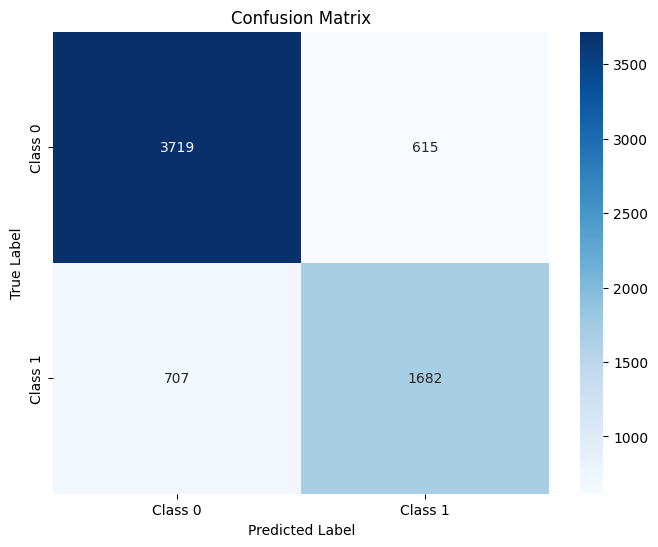

In [45]:
# Hata matrisini görselleştirelim:

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Random Forest Classifier'da, impurity-based feature importances (karışıklık tabanlı öznitelik önem sıralamaları), her bir özniteliğin bir karışıklık ölçütüne göre nasıl katkıda bulunduğunu gösteren bir değer listesidir. Bu impurity (karışıklık) tabanlı önem sıralamaları, her bir ağaçtaki bireysel bölünmelerin ne kadar etkili olduğunu değerlendirmek için kullanılır ve bu bilgi daha sonra tüm orman üzerinde birleştirilir.

Random Forest algoritması, ağaçların oluşturulması sırasında her bölünmenin bir özniteliğe göre yapılmasını sağlar. Bir bölünme, belirli bir özniteliğin bir eşiği belirleyerek veriyi iki alt küme arasında böler. 

Bu bölmeler sırasında, bir impurity (karışıklık) ölçütü kullanılarak veri kümesinin ne kadar "karışık" olduğu değerlendirilir. Örnek olarak, Gini impurity veya Entropy (bilgi kazancı) kullanılabilir.

In [46]:
class_report_rf = report

In [47]:
pip install nbformat==4.2.0

VSCode ortamında bir Jupyter ortamında çalışıldığı için bu kütüphanenin bu ortamda desteklenmediği görüldü.

Bu durumu çözmek için plotly'in plotly.offline modülünü kullanarak grafikleri bir HTML dosyasına kaydedelim ve bu dosyayı daha sonra tarayıcıda açalım. Böylece nu model için en önemli özelliklerin sıralandığı bir grafik görebiliriz:

In [48]:
import plotly.express as px
from plotly.offline import plot

X_df = pd.DataFrame(X, columns=df_filter.columns[:-1])

sorted_idx = rf_model.feature_importances_.argsort()

fig = px.bar(y=X_df.columns[sorted_idx], x=rf_model.feature_importances_[sorted_idx], title="Feature importances")

# HTML dosyasına kaydet
plot(fig, filename='feature_importances.html', auto_open=False)

'feature_importances.html'

KNN Model

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

In [51]:
from sklearn import metrics

# K değerlerinin aralığı
Ks = 10

# KNN modelinin performansını değerlendirmek için kullanılacak metriklerin hesaplanması
#her bir k değeri için hesaplanacak olan:
mean_acc = np.zeros((Ks-1))  # Ortalama doğruluk değerlerini saklamak için bir dizi oluşturulur
std_acc = np.zeros((Ks-1))   # Doğruluk değerlerinin standart sapmasını saklamak için bir dizi oluşturulur

# K değerleri üzerinde döngü
for n in range(1, Ks): #her bir k değeri için;
    
    # KNN modeli oluşturulur ve eğitilir
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    
    # Test seti üzerinde tahmin yapılır
    y_hat = neigh.predict(X_test)
    
    # Doğruluk değeri hesaplanır ve ortalamaya eklenir
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_hat)
    
    # Doğruluk değerinin standart sapması hesaplanır
    std_acc[n-1] = np.std(y_hat == y_test) / np.sqrt(y_hat.shape[0])

In [52]:
mean_acc

array([0.74401309, 0.70801725, 0.71753681, 0.70608359, 0.71842927,
       0.71247955, 0.72021419, 0.71411572, 0.72155288])

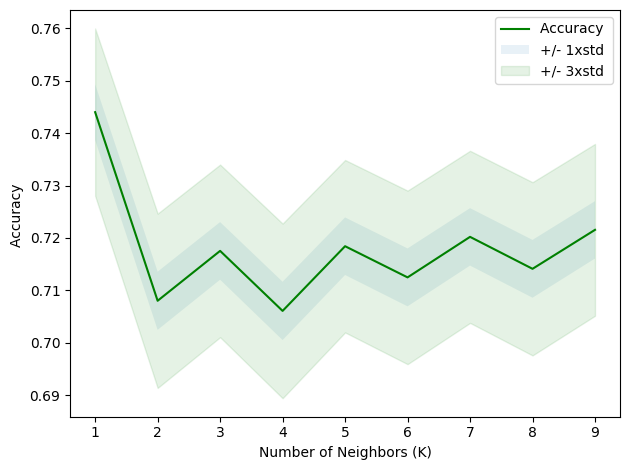

In [53]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [54]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.7440130893946155 with k= 1


In [55]:
class_report_knn = classification_report(y_test, y_hat)
print(f"Classification Report:\n{class_report_knn}")

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79      4334
           1       0.62      0.57      0.59      2389

    accuracy                           0.72      6723
   macro avg       0.69      0.69      0.69      6723
weighted avg       0.72      0.72      0.72      6723



### CatBoost Classifier model

In [56]:
catboost_model = CatBoostClassifier()

catboost_model.fit(X_train, y_train)

Learning rate set to 0.042012
0:	learn: 0.6732656	total: 190ms	remaining: 3m 9s
1:	learn: 0.6559062	total: 229ms	remaining: 1m 54s
2:	learn: 0.6397932	total: 254ms	remaining: 1m 24s
3:	learn: 0.6260513	total: 270ms	remaining: 1m 7s
4:	learn: 0.6129633	total: 283ms	remaining: 56.3s
5:	learn: 0.6011406	total: 317ms	remaining: 52.5s
6:	learn: 0.5911449	total: 335ms	remaining: 47.5s
7:	learn: 0.5814851	total: 346ms	remaining: 42.9s
8:	learn: 0.5735929	total: 361ms	remaining: 39.7s
9:	learn: 0.5660145	total: 384ms	remaining: 38s
10:	learn: 0.5594831	total: 398ms	remaining: 35.8s
11:	learn: 0.5533884	total: 412ms	remaining: 33.9s
12:	learn: 0.5481754	total: 434ms	remaining: 32.9s
13:	learn: 0.5432564	total: 455ms	remaining: 32.1s
14:	learn: 0.5386614	total: 467ms	remaining: 30.7s
15:	learn: 0.5343477	total: 478ms	remaining: 29.4s
16:	learn: 0.5304214	total: 507ms	remaining: 29.3s
17:	learn: 0.5274497	total: 523ms	remaining: 28.5s
18:	learn: 0.5241287	total: 535ms	remaining: 27.6s
19:	learn: 

In [57]:
# Test seti üzerinde tahmin yapalım:
y_pred_catboost = catboost_model.predict(X_test)

In [58]:
# Doğruluk değerini ve diğer metrikleri değerlendirelim:
accuracy_catboost = accuracy_score(y_test, y_pred)
conf_matrix_catboost = confusion_matrix(y_test, y_pred)
class_report_catboost = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy_catboost}")
print(f"Confusion Matrix:\n{conf_matrix_catboost}")
print(f"Classification Report:\n{class_report_catboost}")

Accuracy: 0.8033615945262531
Confusion Matrix:
[[3719  615]
 [ 707 1682]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4334
           1       0.73      0.70      0.72      2389

    accuracy                           0.80      6723
   macro avg       0.79      0.78      0.78      6723
weighted avg       0.80      0.80      0.80      6723



## Model Kıyaslamaları

In [59]:
knn_accuracy= mean_acc.max()
rf_accuracy = test_data_accuracy

In [60]:
# Tabloya Dönüştürme
accuracy_df = pd.DataFrame({
    'Model': ['Random Forest', 'KNN', 'CatBoost'],
    'Accuracy': [rf_accuracy, knn_accuracy, accuracy_catboost]
})

In [61]:
accuracy_df

,Model,Accuracy
0,Random Forest,0.803362
1,KNN,0.744013
2,CatBoost,0.803362


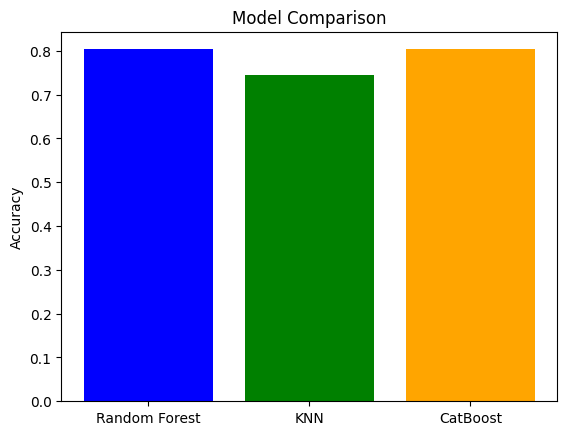

In [62]:
labels = ['Random Forest', 'KNN', 'CatBoost']
accuracies = [rf_accuracy, knn_accuracy, accuracy_catboost]

plt.bar(labels, accuracies, color=['blue', 'green', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()

Sonuç olarak RandomForest Classifier ve CatBoost modelleri aynı başarıda sonuç vermiştir.

KNN Classifier modeli daha az başarılı olmuştur